# Imports & Downloading Dataset

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import csv

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# Get file id from the link
#https://drive.google.com/file/d/1TtfWg3hCGLkDutF-1wPtGLp4srT6vqNP/view?usp=sharing
id = "1TtfWg3hCGLkDutF-1wPtGLp4srT6vqNP"

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('IPBroadcaster_Input_2018-05-27_0.log')  

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=USjFCb3ucEH39KxLo46GeRZhkTnNy4&prompt=consent&access_type=offline&code_challenge=SGy8wjTqTy6JmoTeXcJ1IqY1k-CoNRuoqO1N9PufRz4&code_challenge_method=S256

Enter verification code: 4/1AY0e-g6QZtcDgsUaL-nlDpAEv3nIUyrYqjPX58oXxpgovVbxvnngjkhrcNQ


# Get Completed Laps Data and Write to a CSV File

In [ ]:
# log_file = "IPBroadcaster_Input_2018-05-27_0.log"

# # first ten columns
# header= ['command', 'car_number', 'time_of_day', 'lap_distance', 'vehicle_speed', 
#          'engine_speed', 'gear', 'brake', 'throttle', 'steering','11', '12', '13',
#          '14', '15', '16', '17', '18', 'long_accel', 'lat_accel', 'vert_accel' , 
#          '22', '23', '24', '25', '26','27', '28', '29', 'tire_type','31',
#          '32', '33', '34', '35', '36', '37']

# csv_file_name = '/content/gdrive/MyDrive/HPC/telemetry_final.csv'
# csv_file = open(csv_file_name, 'w')

# writer = csv.DictWriter(csv_file, fieldnames=header)

# writer.writeheader()

# i = 0
# with open(log_file,'r', encoding="cp1252") as f:
#   for line in f:
#     if line.startswith("$P"):
#       #print(line)
#       # each line has \n at the end: remove and split
#       raw_record = line.replace('\n', '').split('¦')
      
#       # there are more than 9 columns, currently we don't need the rest for this lab
#       # raw_record = raw_record[:9]  
#       record = {}
#       # print(len(header))
#       for idx, val in enumerate(raw_record):
#         # time of day
#         # this slow downs the process, but I wanted to use it as a date time
#         # not a string
#         if idx == 2:
#           if val.count(':') == 1:
#             val = '00:' + val
#           elif val.count(':') == 0:
#             val = '00:00:' + val
#           val = pd.to_datetime('2018-05-28 ' + val)
#           #print(val)
#           #print(type(val))
#           #val = np.datetime64(a)
#           #print(val)

#         record[header[idx]] = val

#       # skip this records      
#       if record['car_number'] == 'TEST' or record['car_number'] == '' or record['car_number'].startswith('S'):
#         continue
      
#       # convert car number to integer
#       record['car_number'] = int(record['car_number'])
#       writer.writerow(record)
#       i = i + 1
#       if i % 50000 == 0:
#         print(i, 'records were extracted from the log file')

# csv_file.close()
# print('CSV file was created')

# Read The CSV File

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import csv

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth) 

csv_file_name = '/content/gdrive/MyDrive/HPC/telemetry_final.csv'
dataset_org= pd.read_csv(csv_file_name)

dataset_org

In [ ]:
dataset = dataset_org[['command', 'car_number', 'time_of_day', 'lap_distance', 'vehicle_speed', 
         'engine_speed', 'gear', 'brake', 'throttle', 'steering', 'long_accel', 'lat_accel', 'vert_accel','tire_type']]

In [ ]:
dataset.iloc[:, 2:].corr()

lap_distance  vehicle_speed  ...  lat_accel  vert_accel
lap_distance       1.000000       0.625973  ...  -0.012658   -0.012764
vehicle_speed      0.625973       1.000000  ...  -0.012732   -0.015986
engine_speed       0.620762       0.966005  ...  -0.021277   -0.017700
gear               0.624466       0.868825  ...  -0.002331    0.002593
brake              0.106512      -0.000338  ...   0.103651    0.010091
throttle           0.502320       0.828900  ...  -0.097120   -0.022520
steering           0.036657       0.118276  ...   0.002561   -0.020728
long_accel         0.128770       0.324642  ...   0.066473    0.003363
lat_accel         -0.012658      -0.012732  ...   1.000000   -0.168083
vert_accel        -0.012764      -0.015986  ...  -0.168083    1.000000

[10 rows x 10 columns]

In [ ]:
dataset.dtypes

command           object
car_number         int64
time_of_day       object
lap_distance     float64
vehicle_speed    float64
engine_speed       int64
gear               int64
brake              int64
throttle         float64
steering         float64
long_accel       float64
lat_accel        float64
vert_accel       float64
tire_type         object
dtype: object

In [ ]:
dataset.time_of_day =  pd.to_datetime(dataset.time_of_day) 

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
dataset.dtypes

command                  object
car_number                int64
time_of_day      datetime64[ns]
lap_distance            float64
vehicle_speed           float64
engine_speed              int64
gear                      int64
brake                     int64
throttle                float64
steering                float64
long_accel              float64
lat_accel               float64
vert_accel              float64
tire_type                object
dtype: object

# Get 1 record per second

In [ ]:
dataset['time_of_day'] = dataset['time_of_day'].apply(lambda x: x.replace(microsecond=0))
dataset = dataset.groupby(['car_number','time_of_day']).first()
dataset = dataset.reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset

car_number         time_of_day command  ...  lat_accel  vert_accel  tire_type
0                1 2018-05-28 00:01:08      $P  ...       0.01        1.05        NaN
1                1 2018-05-28 00:01:09      $P  ...       0.02        1.04        NaN
2                1 2018-05-28 00:01:10      $P  ...       0.02        1.04        NaN
3                1 2018-05-28 00:01:11      $P  ...       0.02        1.04        NaN
4                1 2018-05-28 00:01:12      $P  ...       0.02        1.04        NaN
...            ...                 ...     ...  ...        ...         ...        ...
511122         314 2018-05-28 00:00:56      $P  ...       0.00        0.00        NaN
511123         314 2018-05-28 00:02:39      $P  ...       0.00        0.00        NaN
511124         314 2018-05-28 15:37:06      $P  ...       0.00        0.00        NaN
511125         314 2018-05-28 16:04:19      $P  ...       0.00        0.00        NaN
511126         437 2018-05-28 18:27:59      $P  ...       0.17       -1.04        NaN

[511127 rows x 14 columns]

# Get rid of pre-race zero part

In [ ]:
dataset = dataset[pd.to_datetime('2018-05-28 16:12:00.00' ) < dataset.time_of_day].reset_index()
dataset

index  car_number         time_of_day  ... lat_accel  vert_accel  tire_type
0         4324           1 2018-05-28 16:13:58  ...      0.02        1.05        NaN
1         4325           1 2018-05-28 16:13:59  ...      0.01        1.04        NaN
2         4326           1 2018-05-28 16:14:00  ...      0.01        1.05        NaN
3         4327           1 2018-05-28 16:14:01  ...      0.01        1.05        NaN
4         4328           1 2018-05-28 16:14:02  ...      0.01        1.03        NaN
...        ...         ...                 ...  ...       ...         ...        ...
329065  511118          98 2018-05-28 19:25:03  ...      0.01        0.88          P
329066  511119          98 2018-05-28 19:25:04  ...     -0.01        0.96          P
329067  511120          98 2018-05-28 19:25:05  ...     -0.02        0.95          P
329068  511121          98 2018-05-28 19:25:06  ...     -0.02        0.96          P
329069  511126         437 2018-05-28 18:27:59  ...      0.17       -1.04        NaN

[329070 rows x 15 columns]

In [ ]:
min_time = dataset.time_of_day.min()
min_time
max_time = dataset.time_of_day.max() 
max_time
num_records_per_car = (max_time - min_time)
num_records_per_car
num_records_per_car = int(num_records_per_car.total_seconds())
num_records_per_car

11585

In [ ]:
len(dataset.time_of_day.unique())

11522

In [ ]:
#only one time point entry for car 437
dataset = dataset[dataset.car_number != 437]
car_numbers = dataset.car_number.unique()
sorted(car_numbers)
car_numbers


array([ 1,  3,  4,  6,  7,  9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 59, 60, 64, 66, 88, 98])

In [ ]:
speed_data = np.zeros((num_records_per_car +1, len(car_numbers)), dtype=np.float)
speed_data.fill(np.nan)

rpm_data = np.zeros((num_records_per_car +1, len(car_numbers)), dtype=np.float)
rpm_data.fill(np.nan)

distance_data = np.zeros((num_records_per_car +1, len(car_numbers)), dtype=np.float)
distance_data.fill(np.nan)

for car_idx, car in enumerate(car_numbers):
  car_data = dataset[dataset.car_number == car]
  #print(len(car_data))
  for row_idx, row in car_data.iterrows():
    time = int((row.time_of_day - min_time).total_seconds())
    speed_data[time, car_idx] = row.vehicle_speed
    # if car == 24:
    #   print(speed_data[time, car_idx], car_idx, car)
    rpm_data[time, car_idx] = row.engine_speed
    distance_data[time, car_idx] = row.lap_distance
  # if car == 24:
  #   print(speed_data[:,car_idx])
  print('car #', car, 'is completed')


car # 1 is completed
car # 3 is completed
car # 4 is completed
car # 6 is completed
car # 7 is completed
car # 9 is completed
car # 10 is completed
car # 12 is completed
car # 13 is completed
car # 14 is completed
car # 15 is completed
car # 17 is completed
car # 18 is completed
car # 19 is completed
car # 20 is completed
car # 21 is completed
car # 22 is completed
car # 23 is completed
car # 24 is completed
car # 25 is completed
car # 26 is completed
car # 27 is completed
car # 28 is completed
car # 29 is completed
car # 30 is completed
car # 32 is completed
car # 33 is completed
car # 59 is completed
car # 60 is completed
car # 64 is completed
car # 66 is completed
car # 88 is completed
car # 98 is completed


In [ ]:
import matplotlib.pyplot as plt

def viz(speed_data, xlim, ylim, cr):
  fig, ax = plt.subplots(nrows=1,ncols=speed_data.shape[1]//5, figsize=(30,4))
  for i in range(speed_data.shape[1]//5):
    ax[i].plot(speed_data[:,i], color=cr)  
    ax[i].set_title('Car '+str(car_numbers[i]))
    ax[i].set_xlim([0, xlim])
    ax[i].set_ylim([0, ylim])

  j  = 0 
  fig, ax = plt.subplots(nrows=1,ncols=speed_data.shape[1]//5, figsize=(30,4))
  for i in range(speed_data.shape[1]//5, (speed_data.shape[1]*2)//5-1):
    ax[j].plot(speed_data[:,i], color=cr)  
    ax[j].set_title('Car '+str(car_numbers[i]))
    ax[j].set_xlim([0, xlim])
    ax[j].set_ylim([0, ylim])
    j += 1

  l  = 0 
  fig, ax = plt.subplots(nrows=1,ncols=speed_data.shape[1]//5, figsize=(30,4))
  for i in range((speed_data.shape[1]*2)//5, (speed_data.shape[1]*3)//5-1):
    ax[l].plot(speed_data[:,i], color=cr)  
    ax[l].set_title('Car '+str(car_numbers[i]))
    ax[l].set_xlim([0, xlim])
    ax[l].set_ylim([0, ylim])
    l += 1

  l  = 0 
  fig, ax = plt.subplots(nrows=1,ncols=speed_data.shape[1]//5, figsize=(30,4))
  for i in range((speed_data.shape[1]*3)//5, (speed_data.shape[1]*4)//5-1):
    ax[l].plot(speed_data[:,i], color=cr)  
    ax[l].set_title('Car '+str(car_numbers[i]))
    ax[l].set_xlim([0, xlim])
    ax[l].set_ylim([0, ylim])
    l += 1

  l  = 0 
  fig, ax = plt.subplots(nrows=1,ncols=speed_data.shape[1]//5, figsize=(30,4))
  for i in range((speed_data.shape[1]*4)//5, (speed_data.shape[1]*5)//5-1):
    ax[l].plot(speed_data[:,i], color=cr)  
    ax[l].set_title('Car '+str(car_numbers[i]))
    ax[l].set_xlim([0, xlim])
    ax[l].set_ylim([0, ylim])
    l += 1

  plt.figure(figsize=(3.5,3.5))
  plt.plot(speed_data[:,i], color=cr)
  plt.xlim([0, xlim])
  plt.ylim([0, ylim])
  plt.title('Car 98')



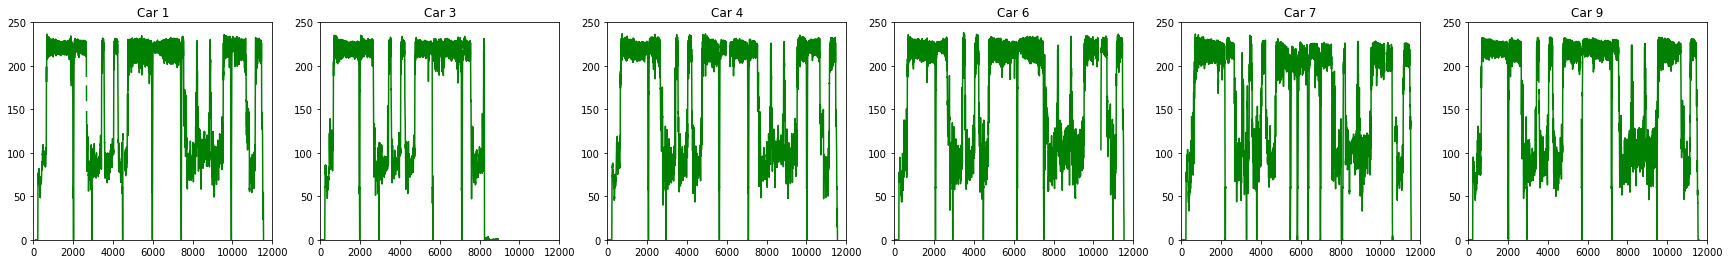

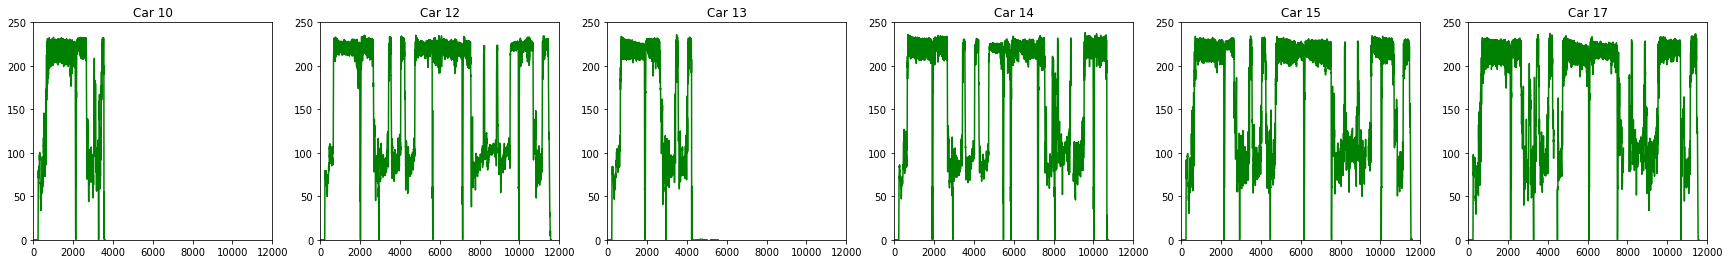

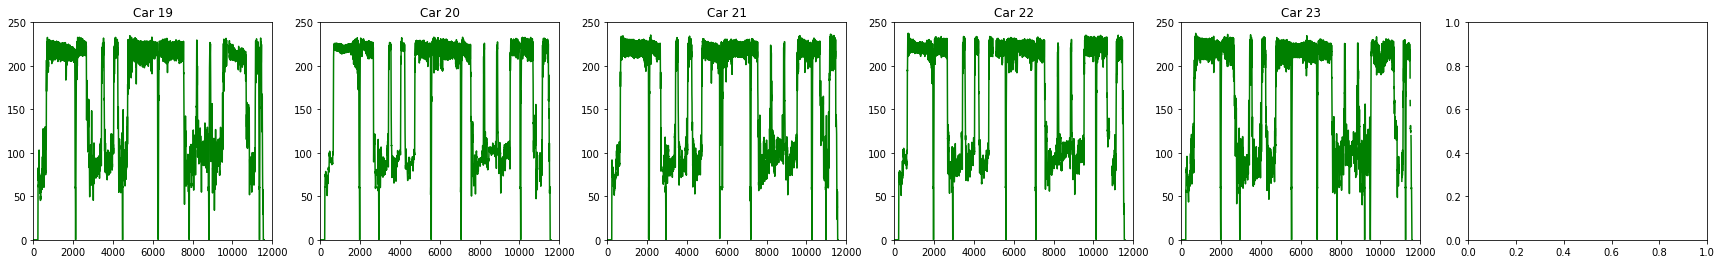

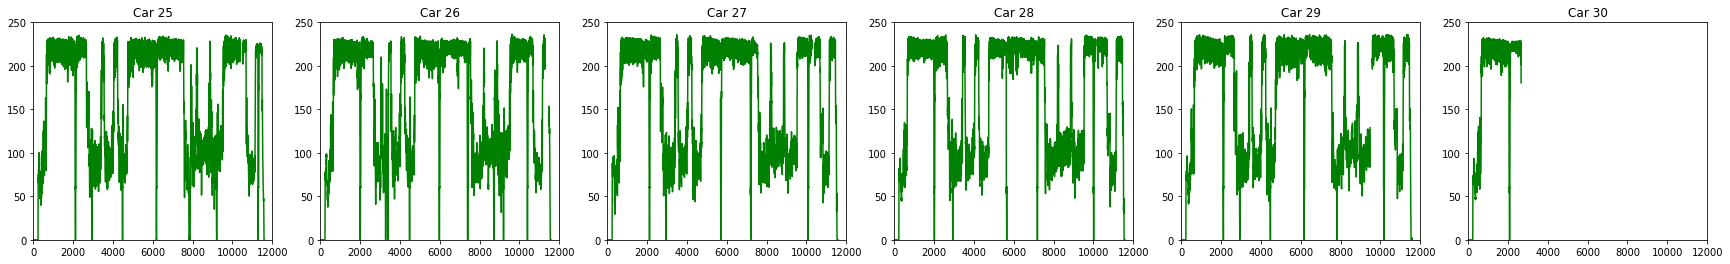

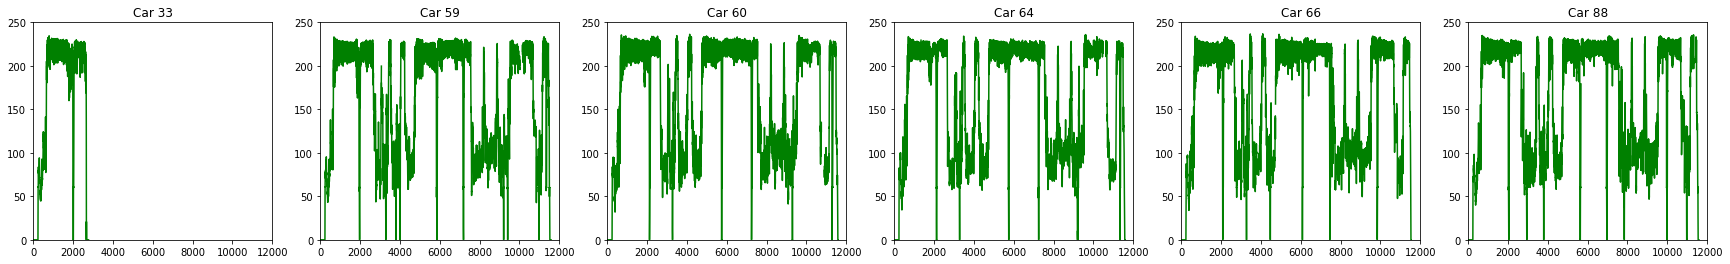

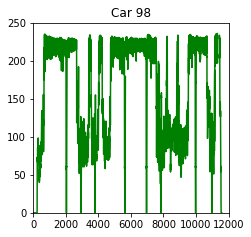

In [ ]:
viz(speed_data, 12000, 250, 'green')

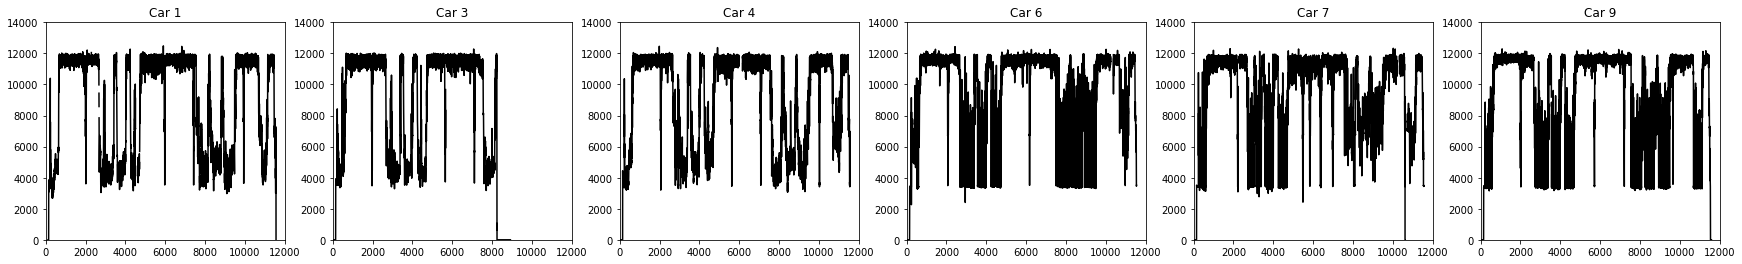

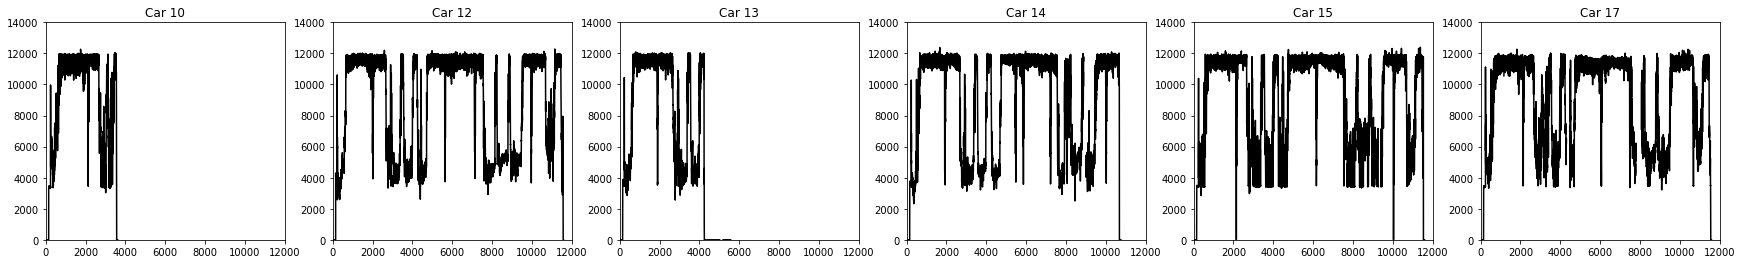

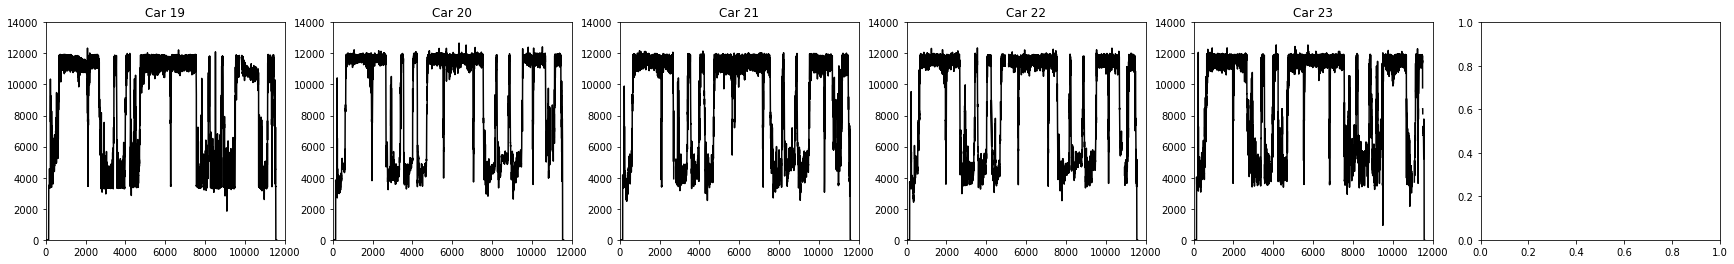

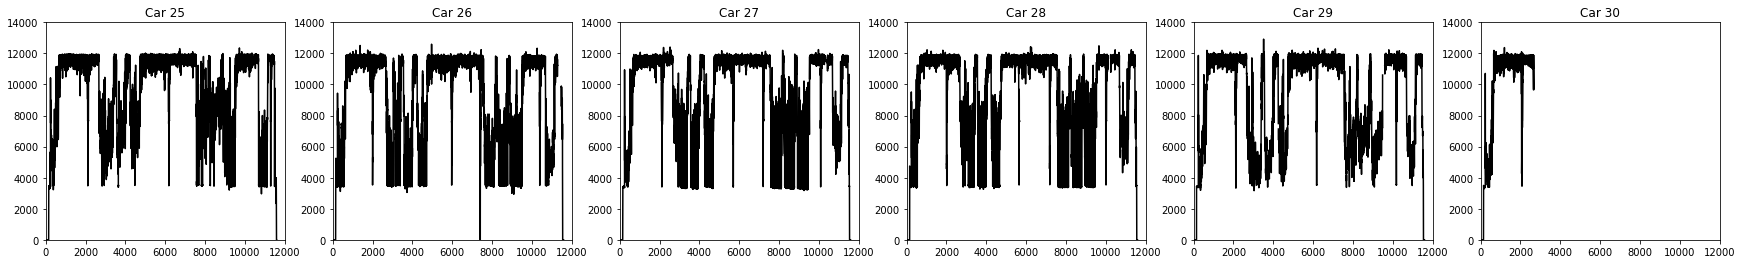

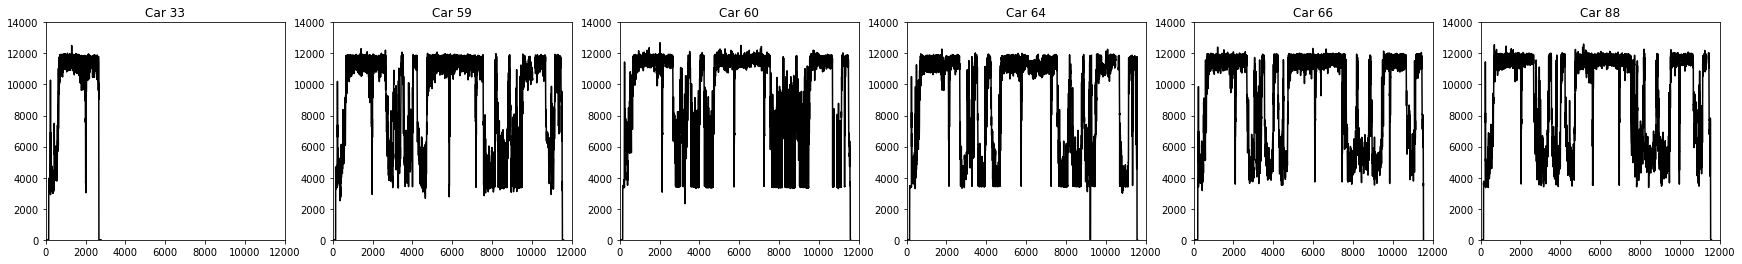

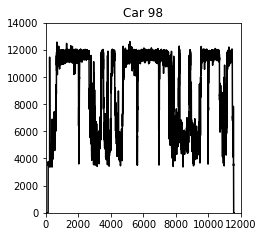

In [ ]:
viz(rpm_data, 12000, 14000, 'black')

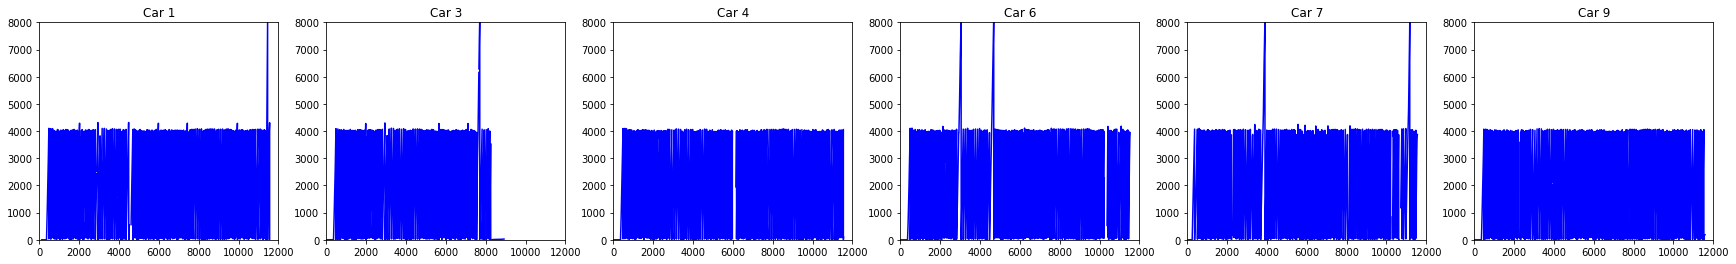

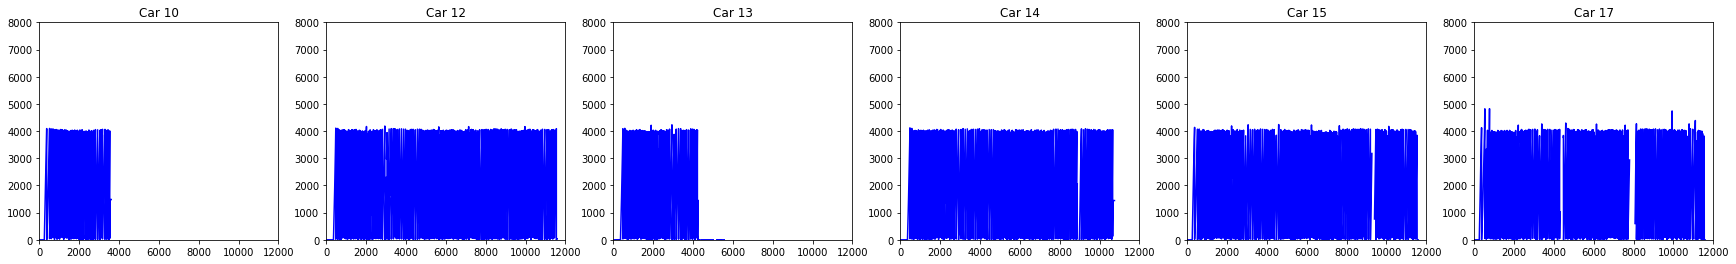

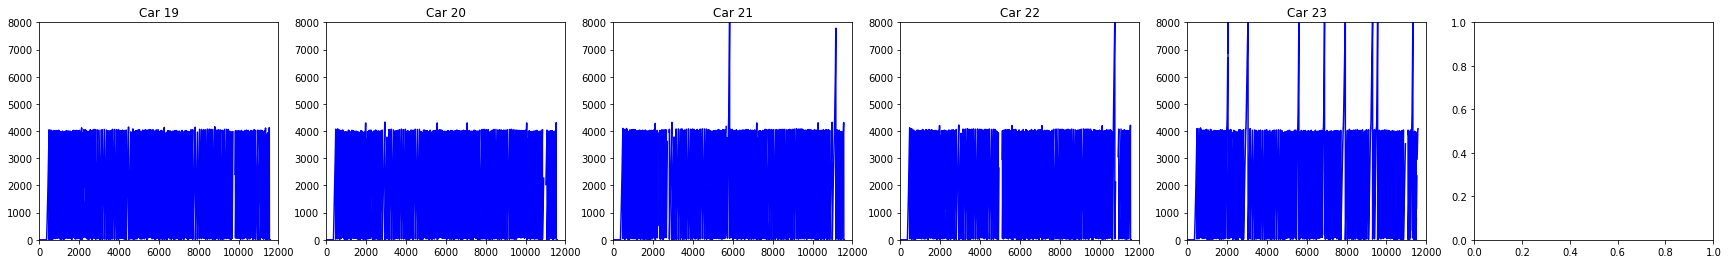

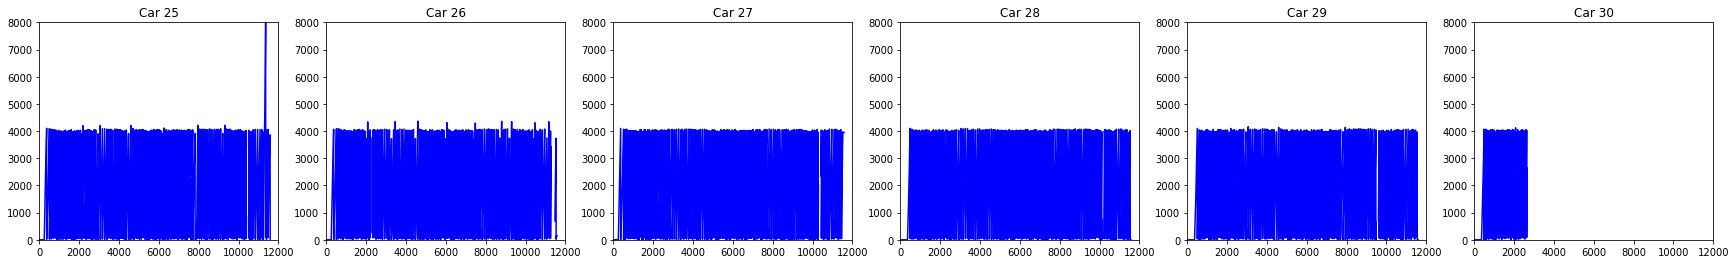

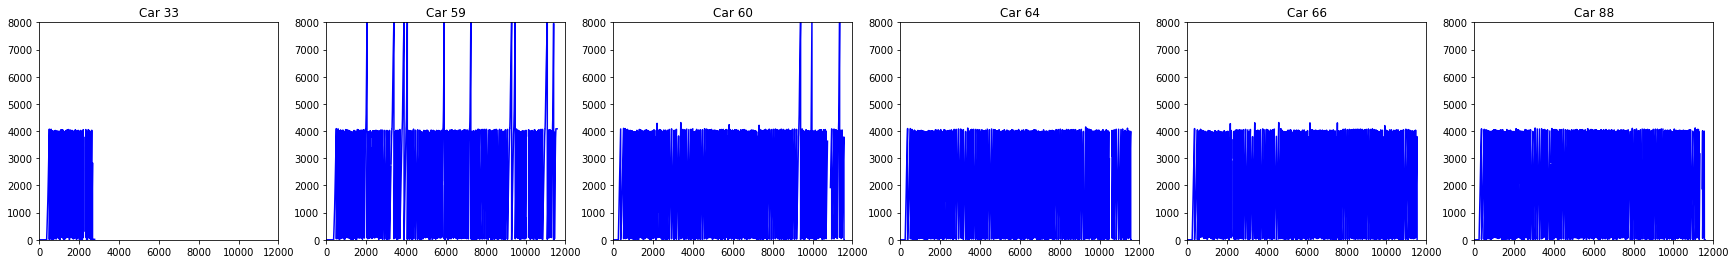

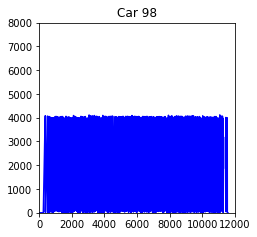

In [ ]:
viz(distance_data, 12000, 8000, 'blue')

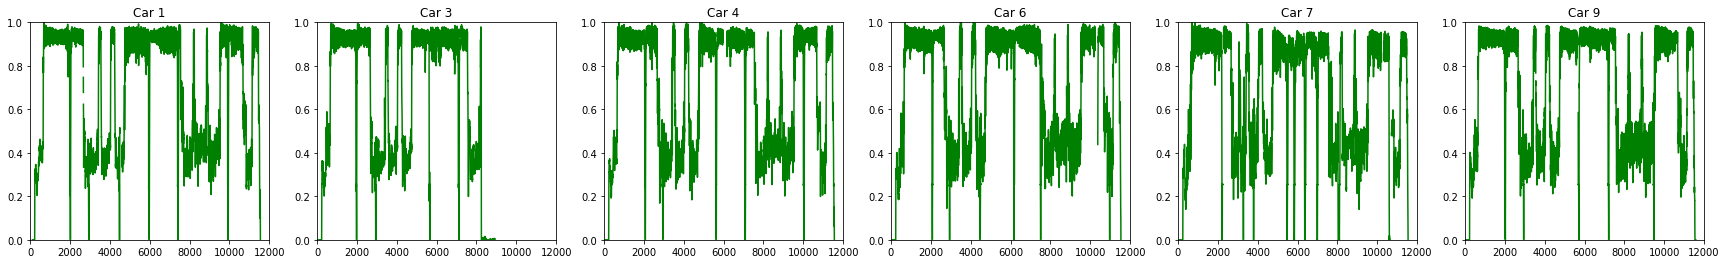

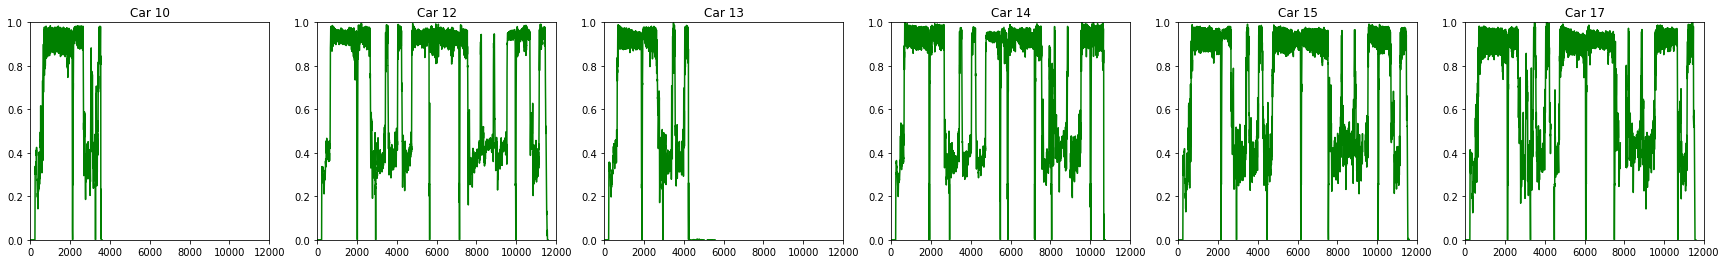

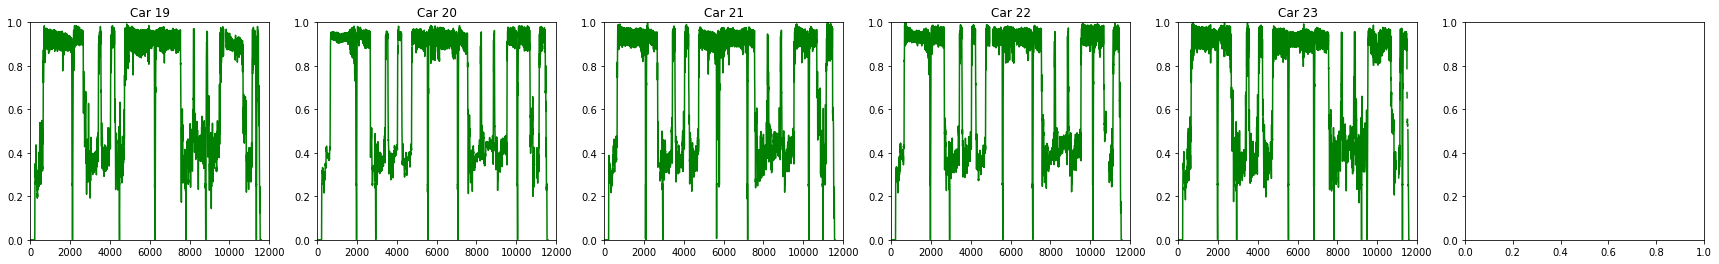

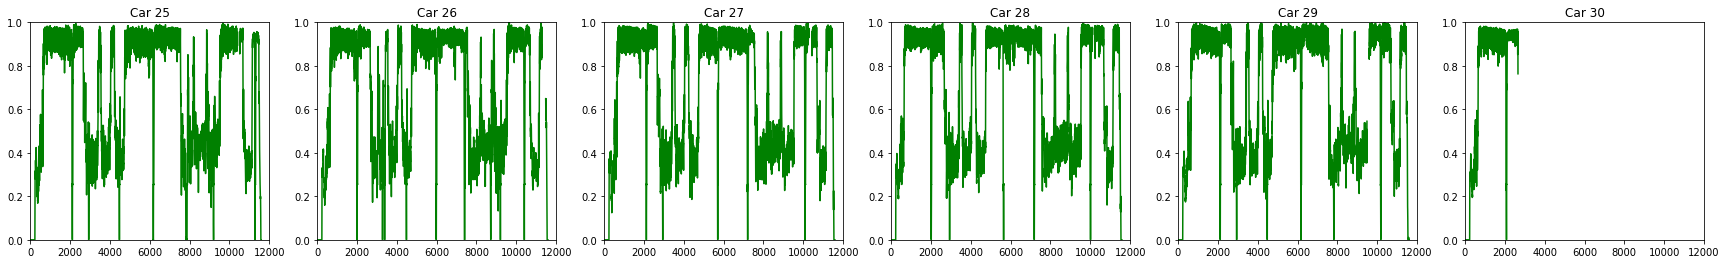

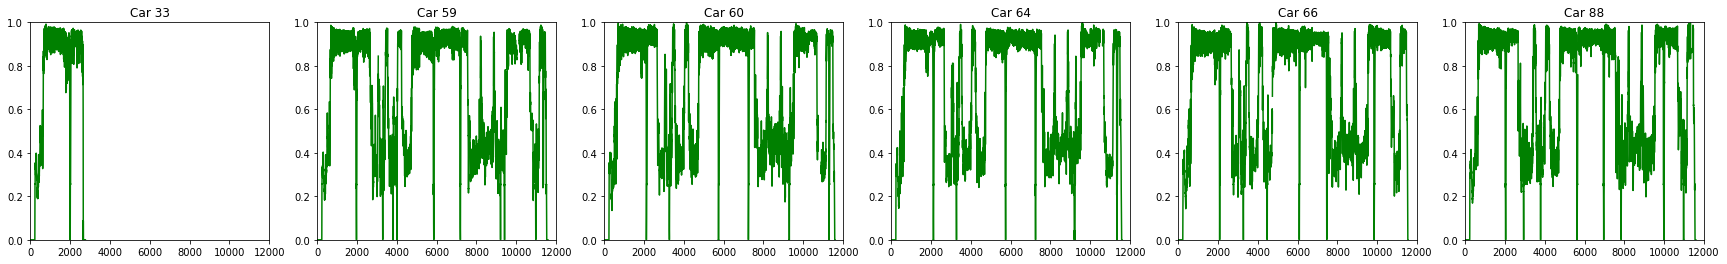

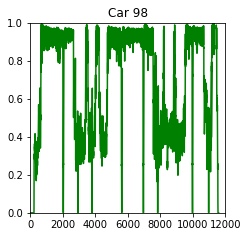

In [ ]:
max_speed = pd.DataFrame(speed_data).dropna().max()[0]
speed_data_scaled = speed_data / max_speed
viz(speed_data_scaled, 12000, 1, 'green')

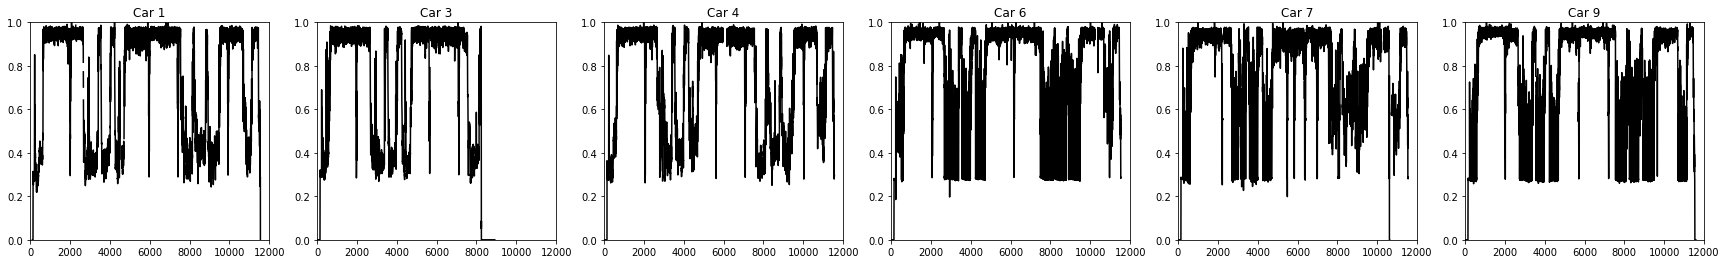

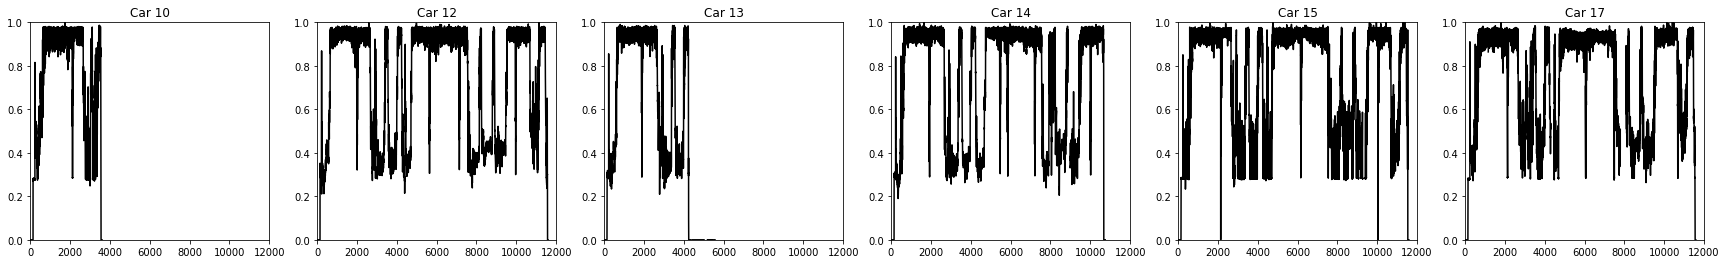

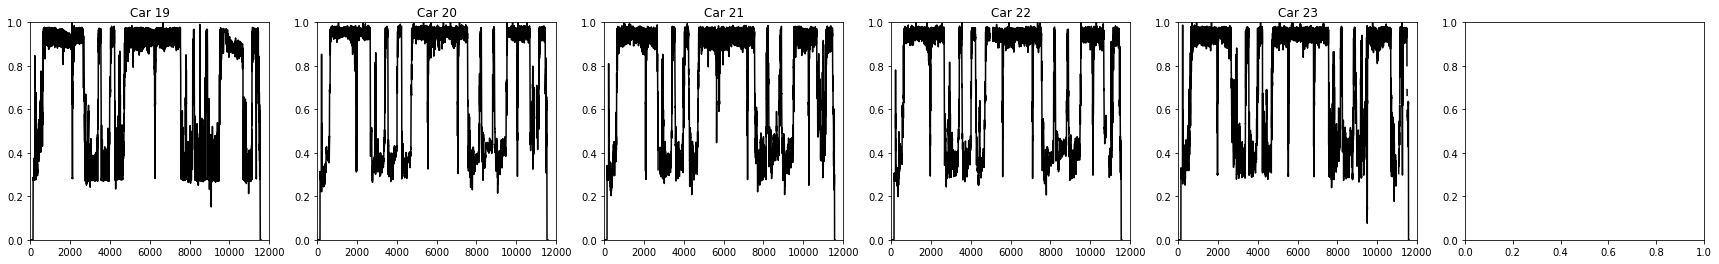

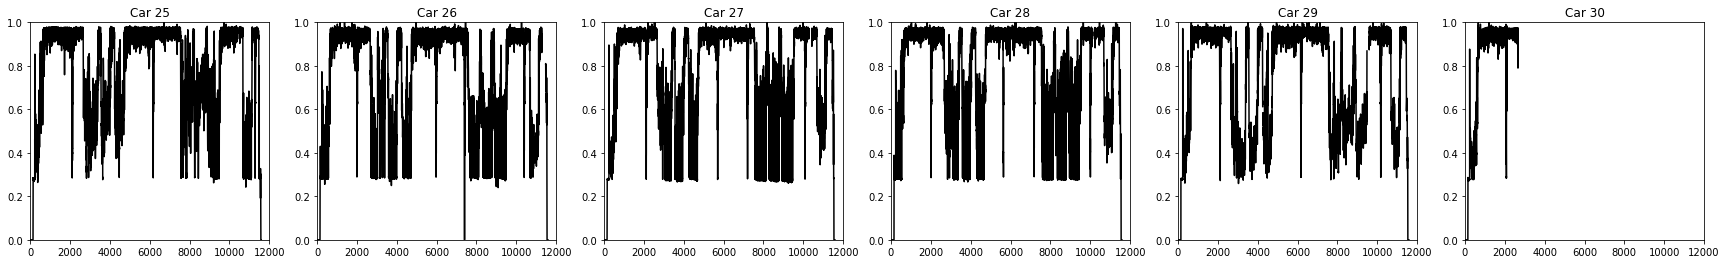

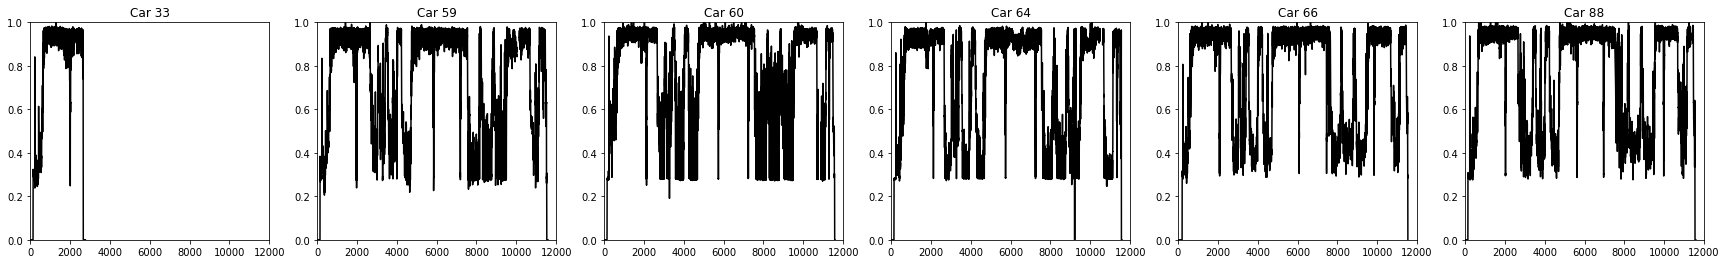

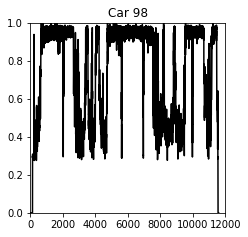

In [ ]:
max_rpm = pd.DataFrame(rpm_data).dropna().max()[0]
rpm_data_scaled = rpm_data / max_rpm
viz(rpm_data_scaled, 12000, 1, 'black')

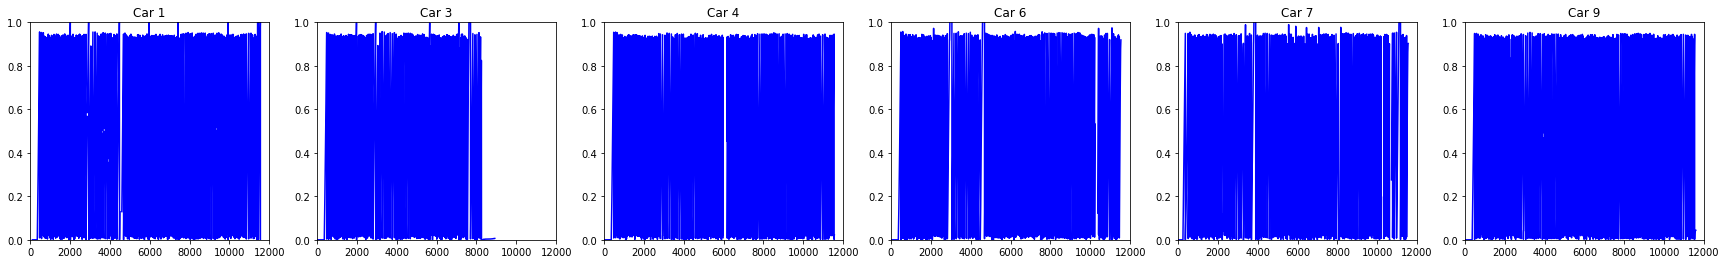

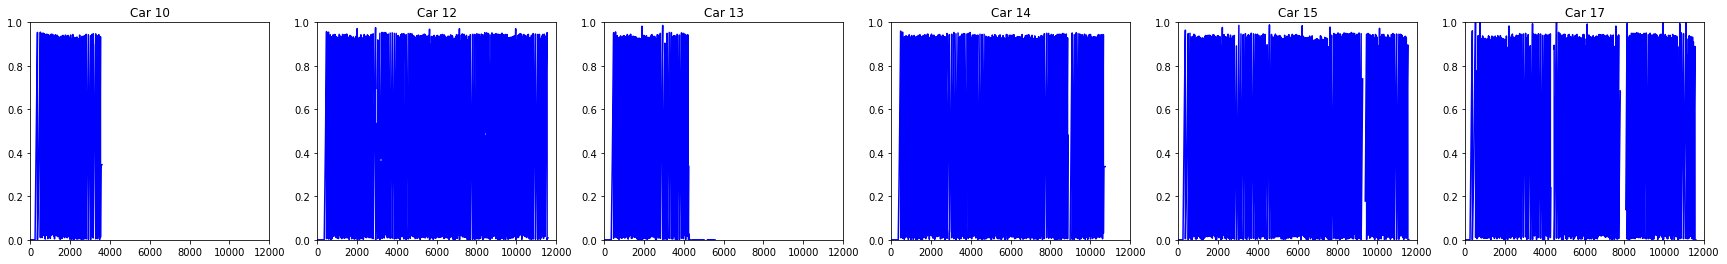

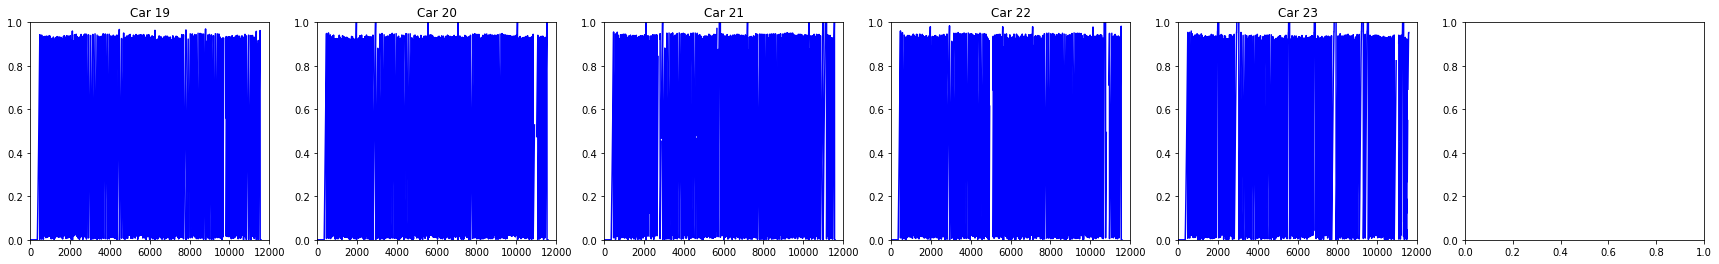

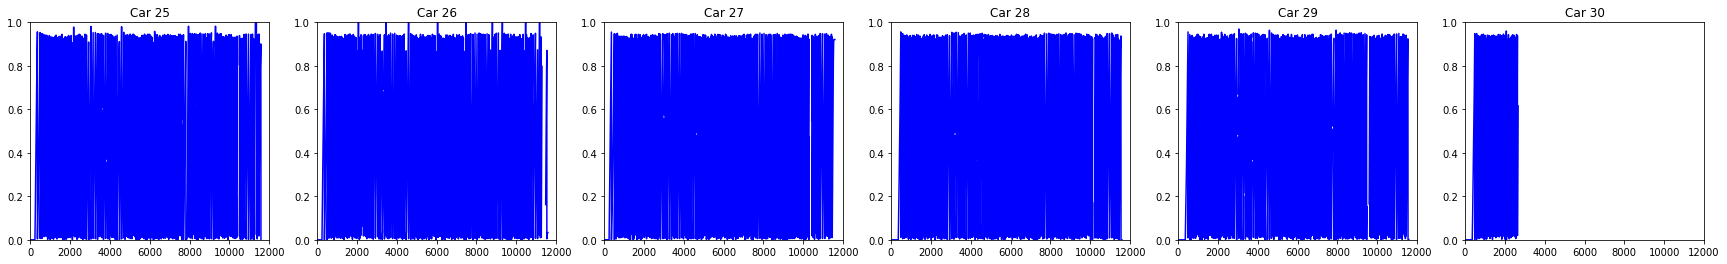

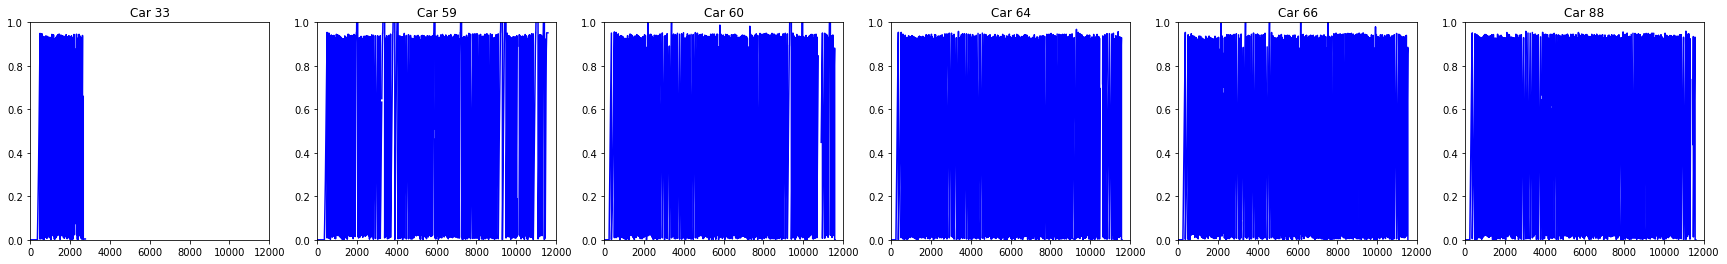

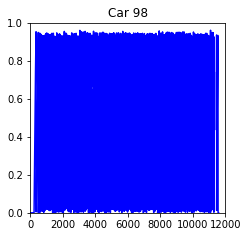

In [ ]:
max_dist = pd.DataFrame(distance_data).dropna().max()[0]
dist_data_scaled = distance_data / max_dist
viz(dist_data_scaled, 12000, 1, 'blue')

In [ ]:
df = pd.DataFrame(np.array(range(num_records_per_car+1)), columns=['index'])
car_names = []
for car_idx, cn in enumerate(car_numbers):
  sp = list(speed_data[:, car_idx])
  column_name = "car_" + str(cn)
  car_names.append(column_name)
  df[column_name] = sp

In [ ]:
df

index  car_1  car_3  car_4  ...  car_64  car_66  car_88  car_98
0          0    NaN    0.0    0.0  ...     0.0     0.0     NaN     0.0
1          1    NaN    0.0    0.0  ...     0.0     0.0     NaN     0.0
2          2    NaN    0.0    0.0  ...     0.0     0.0     NaN     0.0
3          3    NaN    0.0    0.0  ...     0.0     0.0     NaN     0.0
4          4    NaN    0.0    0.0  ...     0.0     0.0     NaN     0.0
...      ...    ...    ...    ...  ...     ...     ...     ...     ...
11581  11581    NaN    NaN    NaN  ...     0.0     NaN     0.0     0.0
11582  11582    NaN    NaN    NaN  ...     0.0     NaN     0.0     0.0
11583  11583    NaN    NaN    NaN  ...     0.0     NaN     0.0     0.0
11584  11584    NaN    NaN    NaN  ...     0.0     NaN     0.0     0.0
11585  11585    NaN    NaN    NaN  ...     0.0     NaN     0.0     0.0

[11586 rows x 34 columns]

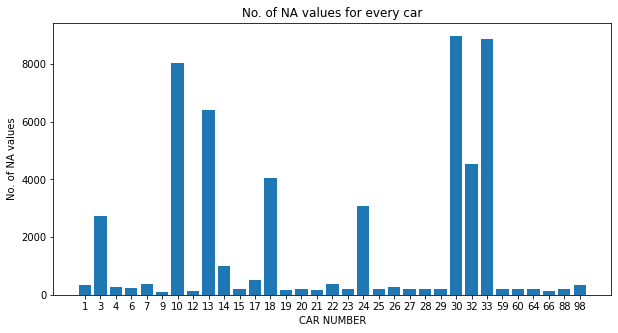

In [ ]:
d = pd.DataFrame(np.sum(df.isna()))
d = d.iloc[1:, :]
# d['car_no'] = d.iloc[:,0]
# d['NAs'] = d.iloc[:,1]
cn = [str(c) for c in car_numbers]
plt.figure(figsize=(10, 5))
plt.bar(cn,list(d[0]))
plt.title('No. of NA values for every car')
plt.xlabel('CAR NUMBER')
plt.ylabel('No. of NA values')
plt.show()

In [ ]:
car_numbers

array([ 1,  3,  4,  6,  7,  9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 59, 60, 64, 66, 88, 98])

In [ ]:
df

index  car_1  car_3  car_4  ...  car_64  car_66  car_88  car_98
0          0    NaN    0.0    0.0  ...     0.0     0.0     NaN     0.0
1          1    NaN    0.0    0.0  ...     0.0     0.0     NaN     0.0
2          2    NaN    0.0    0.0  ...     0.0     0.0     NaN     0.0
3          3    NaN    0.0    0.0  ...     0.0     0.0     NaN     0.0
4          4    NaN    0.0    0.0  ...     0.0     0.0     NaN     0.0
...      ...    ...    ...    ...  ...     ...     ...     ...     ...
11581  11581    NaN    NaN    NaN  ...     0.0     NaN     0.0     0.0
11582  11582    NaN    NaN    NaN  ...     0.0     NaN     0.0     0.0
11583  11583    NaN    NaN    NaN  ...     0.0     NaN     0.0     0.0
11584  11584    NaN    NaN    NaN  ...     0.0     NaN     0.0     0.0
11585  11585    NaN    NaN    NaN  ...     0.0     NaN     0.0     0.0

[11586 rows x 34 columns]

In [ ]:
df['index'] = None
df = df.iloc[:, 1:]
#  [ 1,  4,  6,  7,  9, 12, 14, 15, 17, 19, 20, 21, 22,
#        23, 25, 26, 27, 28, 29, 32, 59, 60, 64, 66, 88, 98]
#df.to_csv('/content/gdrive/MyDrive/HPC/formatted.csv')

In [ ]:
df_final = df[['car_1','car_4','car_6','car_7','car_9','car_12',
 'car_15', 'car_17', 'car_19', 'car_20', 'car_21', 'car_22', 'car_23', 'car_25',
 'car_26', 'car_27', 'car_28', 'car_29', 'car_59', 'car_60', 'car_64', 'car_66',
 'car_88', 'car_98']]

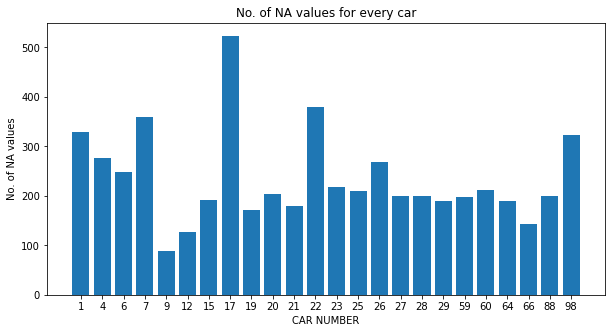

In [ ]:
cs = [ 1,  4,  6,  7,  9, 12, 15, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 59, 60, 64, 66, 88, 98]
d = pd.DataFrame(np.sum(df_final.isna()))
# d = d.iloc[1:, :]
# d['car_no'] = d.iloc[:,0]
# d['NAs'] = d.iloc[:,1]
cn = [str(c) for c in cs]
plt.figure(figsize=(10, 5))
plt.bar(cn,list(d[0]))
plt.title('No. of NA values for every car')
plt.xlabel('CAR NUMBER')
plt.ylabel('No. of NA values')
plt.show()

In [ ]:
df_final[df_final.isna()] = 0
df_final 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


car_1  car_4  car_6  car_7  ...  car_64  car_66  car_88  car_98
0        0.0    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
1        0.0    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
2        0.0    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
3        0.0    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
4        0.0    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
...      ...    ...    ...    ...  ...     ...     ...     ...     ...
11581    0.0    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
11582    0.0    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
11583    0.0    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
11584    0.0    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
11585    0.0    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0

[11586 rows x 24 columns]

In [ ]:
df_f = df_final.iloc[228: , ]
df_f

car_1  car_4  car_6  car_7  ...  car_64  car_66  car_88  car_98
228     0.00    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
229     0.00    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
230     0.00    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
231    13.65    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
232    27.67    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
...      ...    ...    ...    ...  ...     ...     ...     ...     ...
11581   0.00    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
11582   0.00    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
11583   0.00    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
11584   0.00    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0
11585   0.00    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0

[11358 rows x 24 columns]

In [ ]:
# new_dataset.to_csv("telemetry_cleaned.csv")  
# dataset.to_csv("usuable_dataset.csv")
df_f.to_csv('/content/gdrive/MyDrive/HPC/formatted.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import math
# def cumulative_speed_sum(car_number, dataset):
#   car_data = dataset[dataset.car_number == car_number]
#   car_speed = car_data.speed_scaled.values

#   car_cumulative = np.zeros((len(car_speed)))
#   sum = 0
#   for i in range(0, len(car_speed)-1):
#     if math.isnan(car_speed[i]):
#       car_cumulative[i] = sum
#       pass
#     elif car_speed[i] < 0.01:
#       car_cumulative[i] = sum
#       sum = 0
#     else:
#       sum = sum + car_speed[i]
#       car_cumulative[i] = sum
#   return car_cumulative
  
# def cumulative_rpm_sum(car_number, dataset):
#   car_data = dataset[dataset.car_number == car_number]
#   car_speed = car_data.speed_scaled.values
#   car_rpm = car_data.rpm_scaled.values

#   car_cumulative = np.zeros((len(car_speed)))
#   sum = 0
#   for i in range(0, len(car_speed)-1):
#     if math.isnan(car_speed[i]):
#       car_cumulative[i] = sum
#       pass
#     elif car_speed[i] < 0.01:
#       car_cumulative[i] = sum
#       sum = 0
#     else:
#       sum = sum + car_rpm[i]
#       car_cumulative[i] = sum
#   return car_cumulative

# import matplotlib.pyplot as plt

# car12_cum_speed = cumulative_speed_sum(12, new_dataset)
# car20_cum_speed = cumulative_speed_sum(20, new_dataset)
# car9_cum_speed = cumulative_speed_sum(9, new_dataset)
# plt.plot(car12_cum_speed)
# #plt.plot(car20_cum_speed)
# plt.plot(car9_cum_speed)

# car12_cum_rpm = cumulative_rpm_sum(12, new_dataset)
# car20_cum_rpm = cumulative_rpm_sum(20, new_dataset)
# car9_cum_rpm = cumulative_rpm_sum(9, new_dataset)
# plt.plot(car12_cum_rpm)
# #plt.plot(car20_cum_rpm)
# plt.plot(car9_cum_rpm)

In [ ]:
# a = new_dataset[new_dataset.car_number == 12].speed.values
# b = new_dataset[new_dataset.car_number == 9].speed.values


# plt.plot(a)
# plt.plot(b)

In [ ]:
comp_laps = pd.read_csv('/content/drive/MyDrive/HPC/completed_laps.csv')
comp_laps = comp_laps.groupby(['car_number','completed_laps']).first()
comp_laps=comp_laps.reset_index()
comp_laps['last_laptime'] = comp_laps['last_laptime'] * 60
comp_laps

car_number  completed_laps  ... start_position laps_led
0            1.0               0  ...              4        0
1            1.0               1  ...              4        0
2            1.0               2  ...              4        0
3            1.0               3  ...              4        0
4            1.0               4  ...              4        0
...          ...             ...  ...            ...      ...
5764        98.0             196  ...             12        0
5765        98.0             197  ...             12        0
5766        98.0             198  ...             12        0
5767        98.0             199  ...             12        0
5768        98.0             200  ...             12        0

[5769 rows x 25 columns]

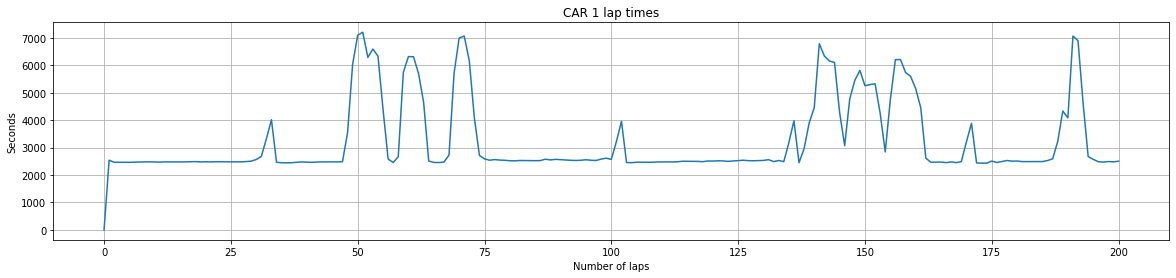

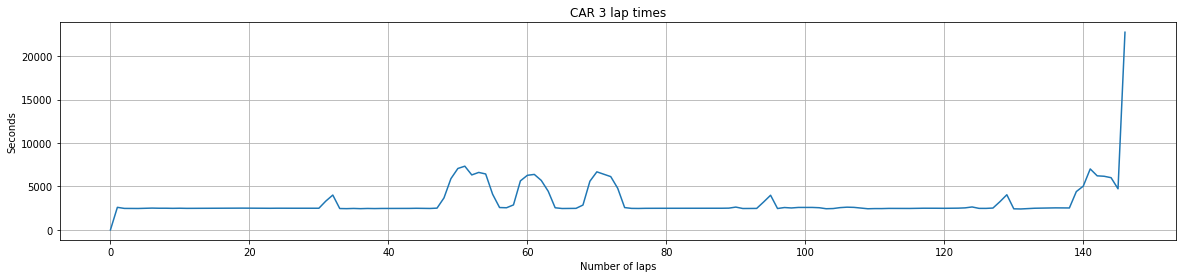

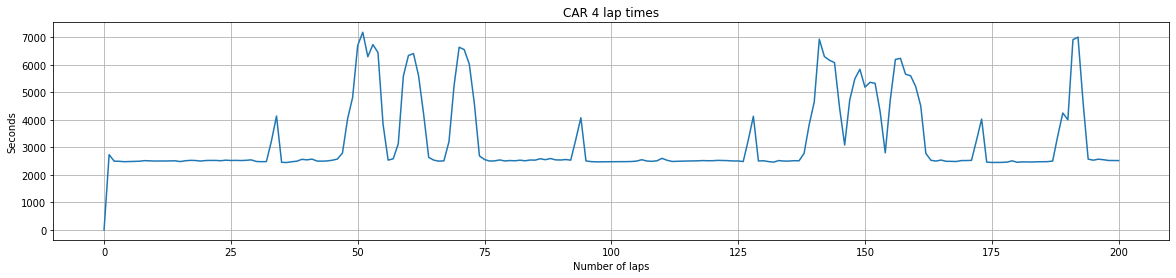

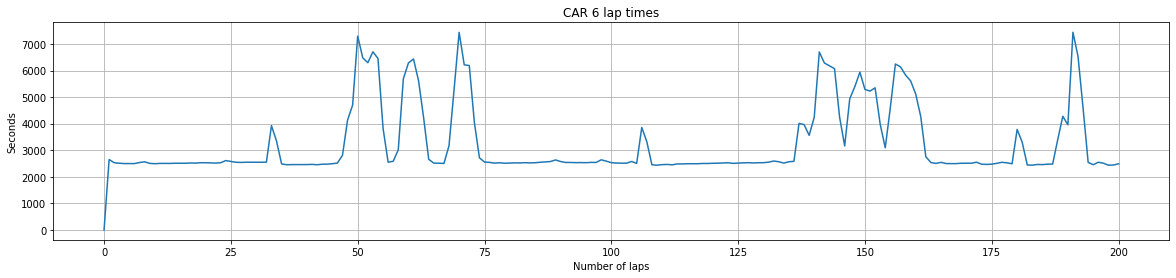

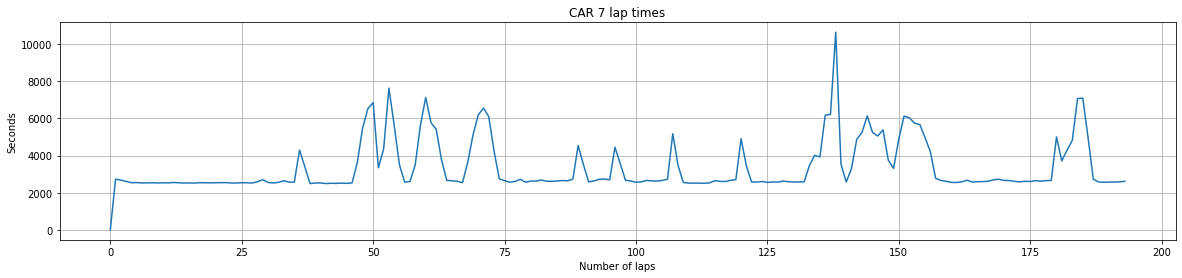

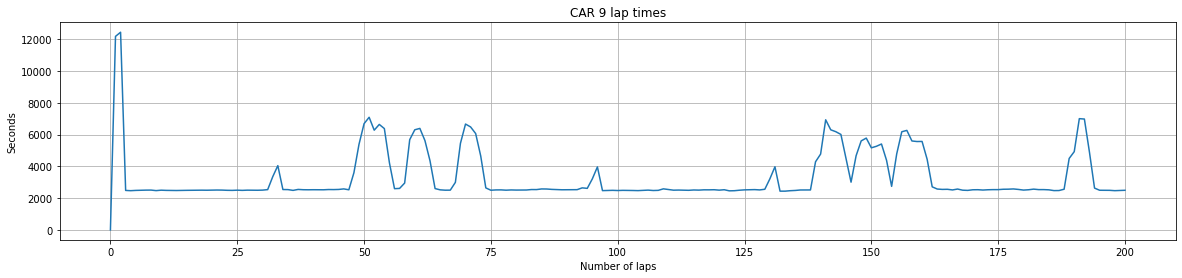

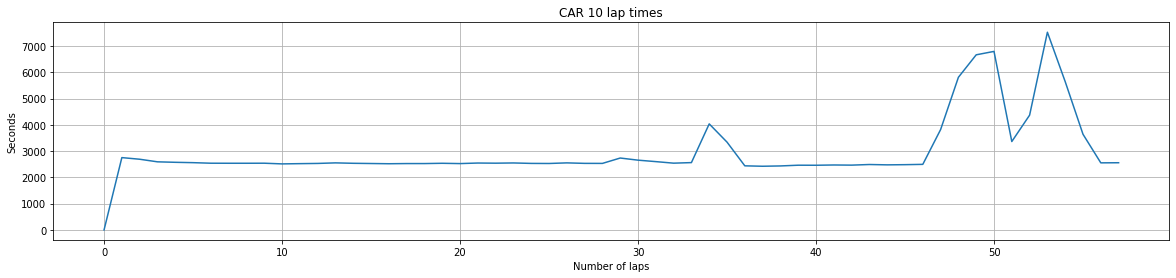

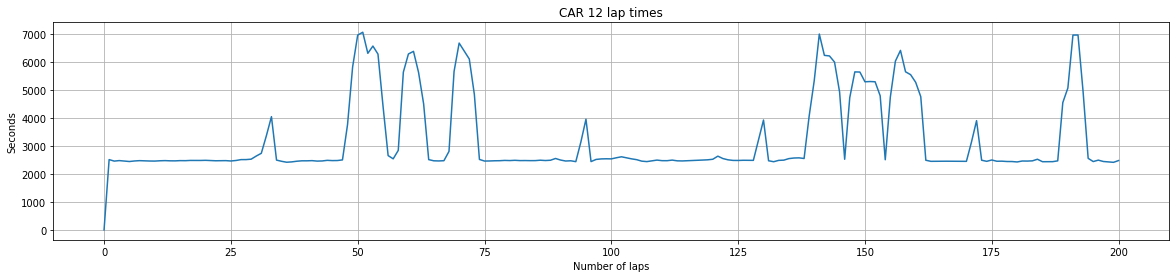

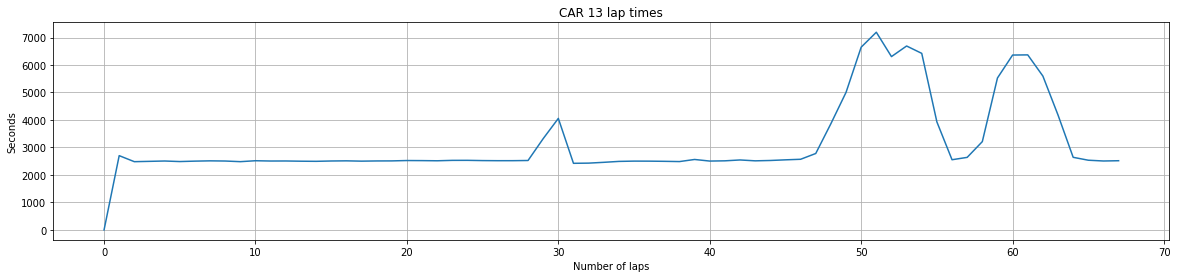

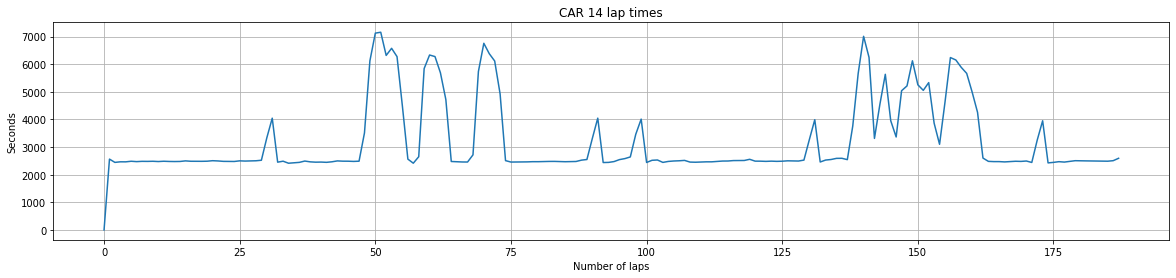

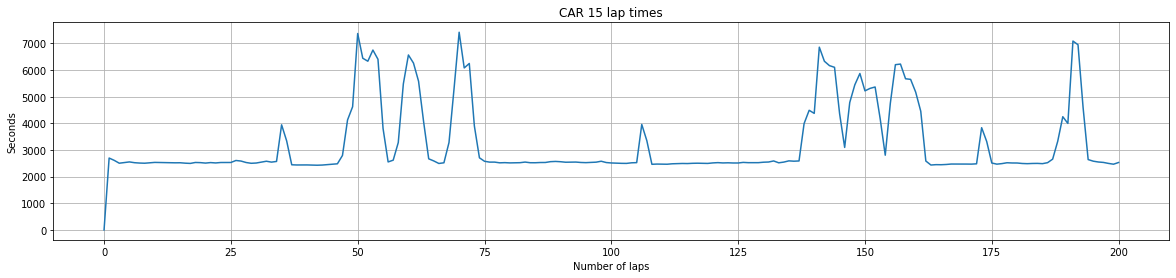

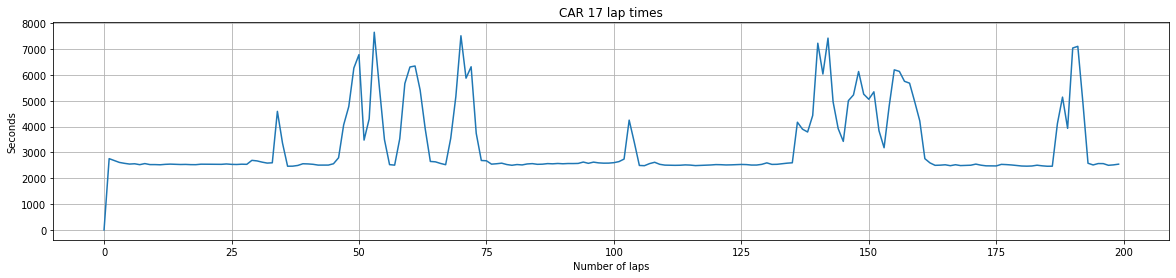

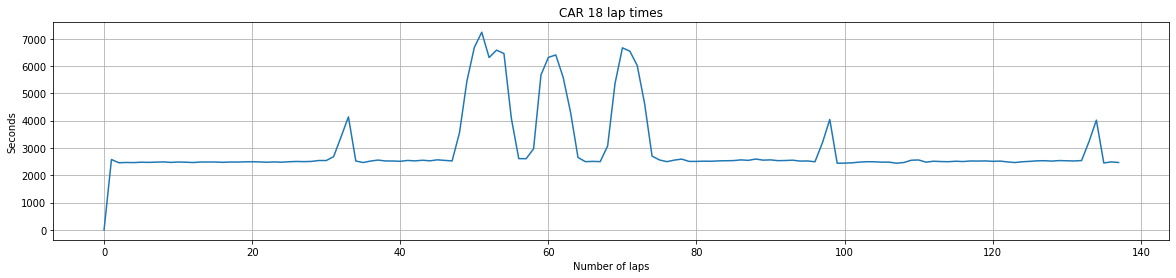

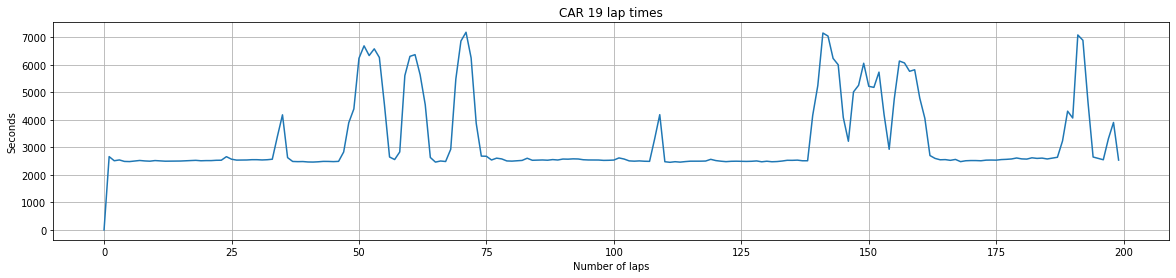

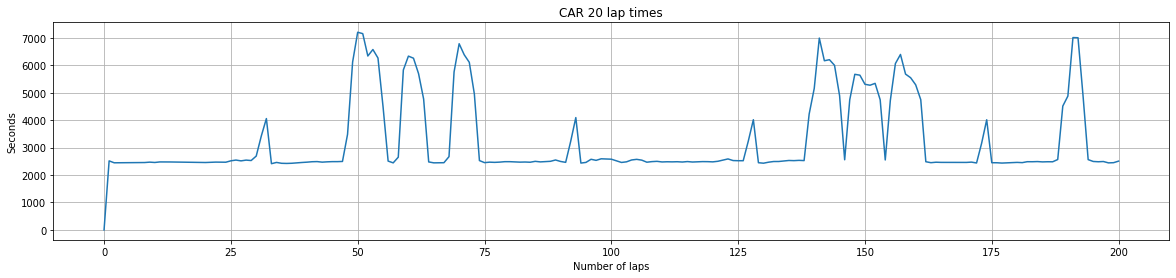

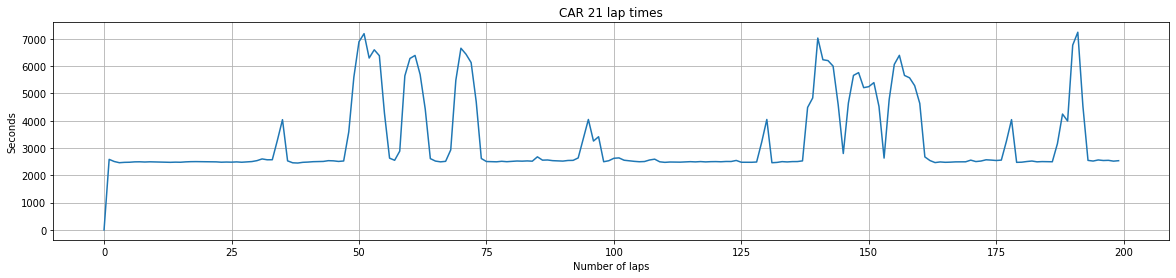

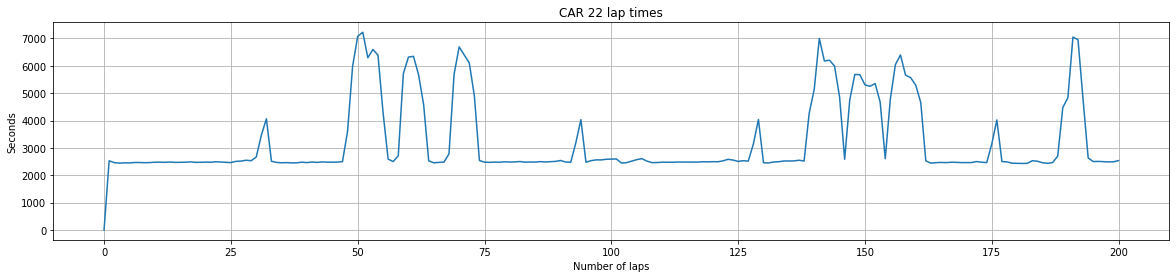

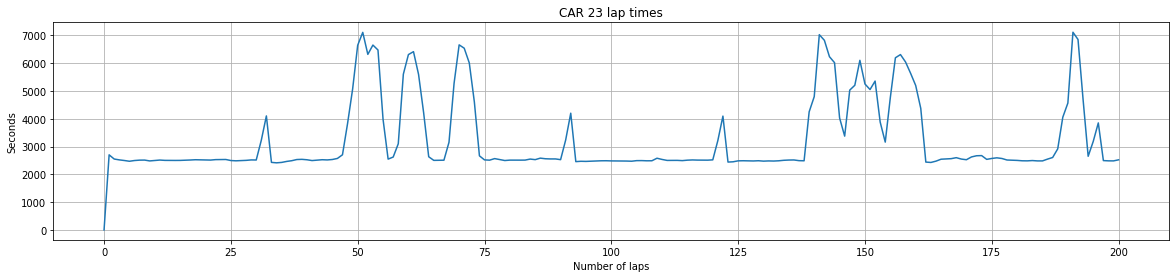

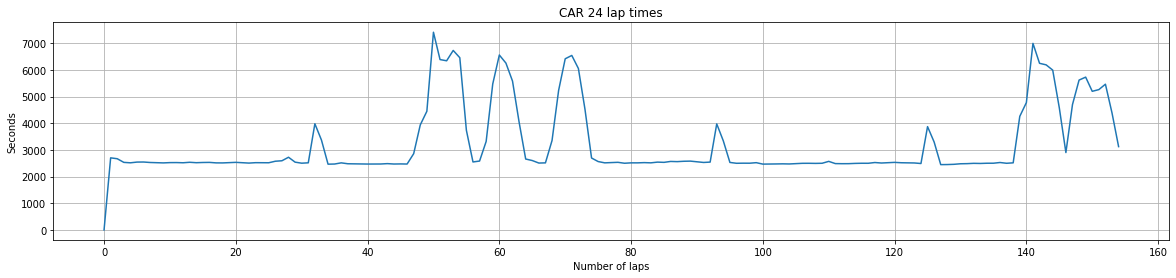

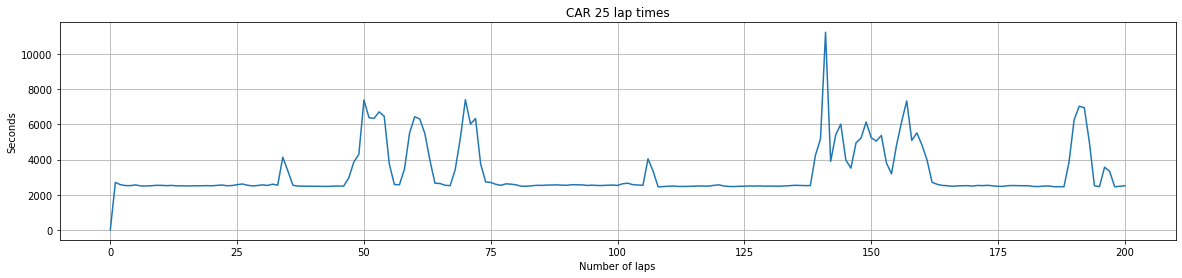

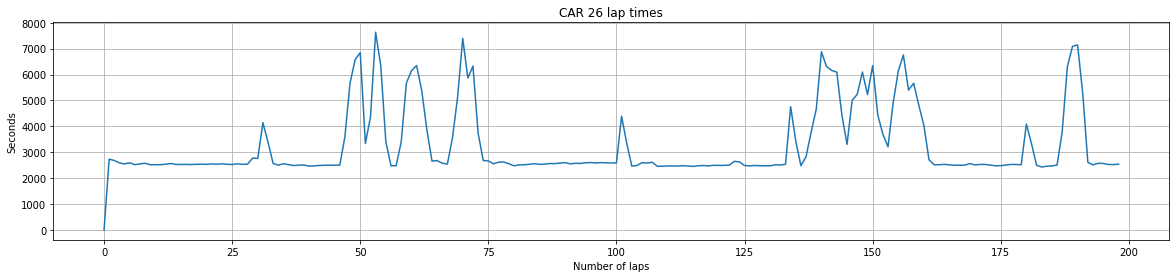

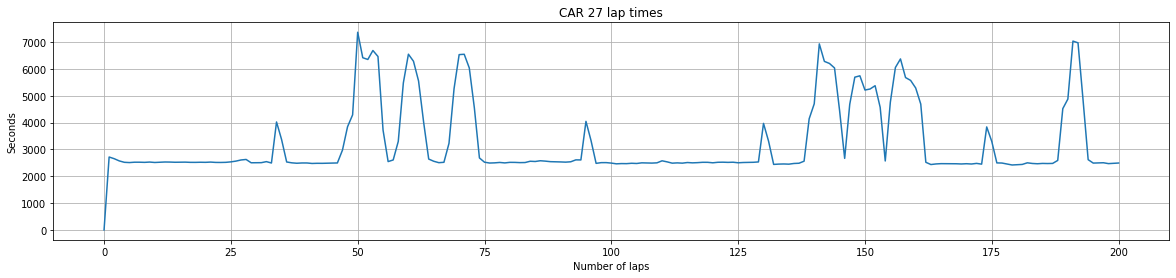

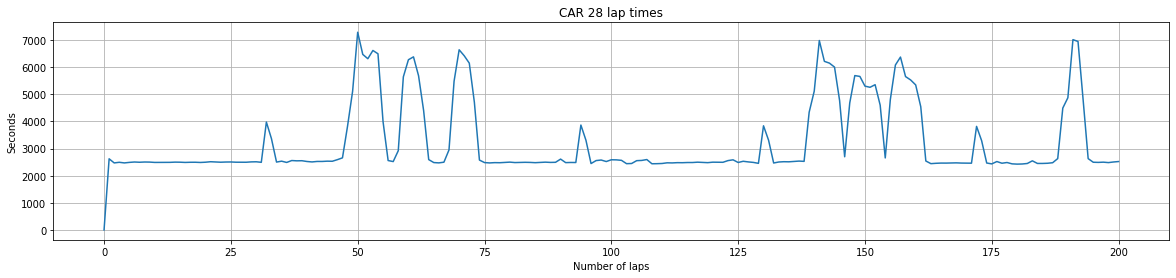

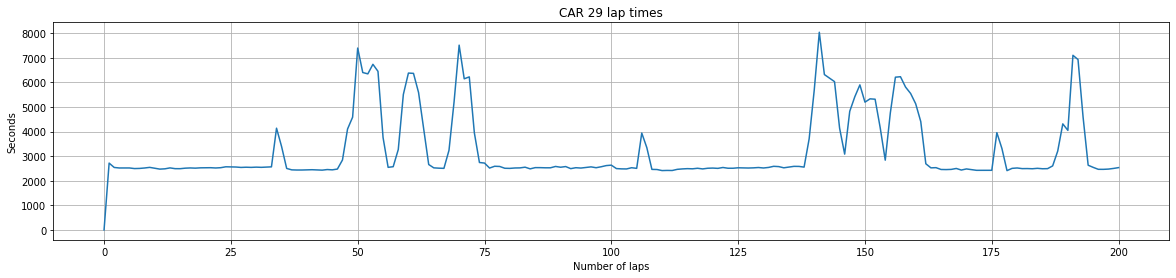

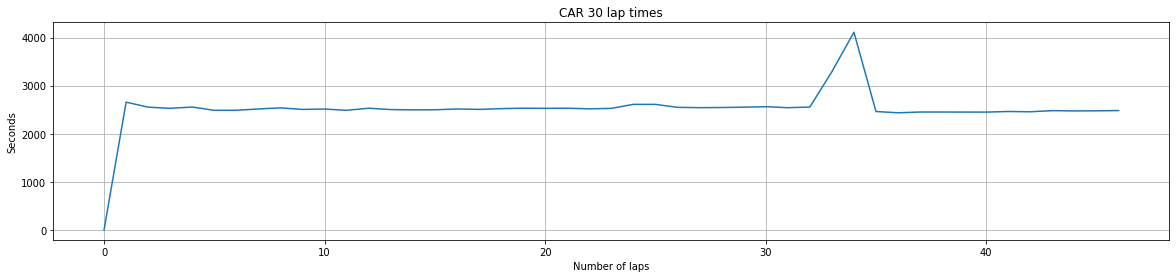

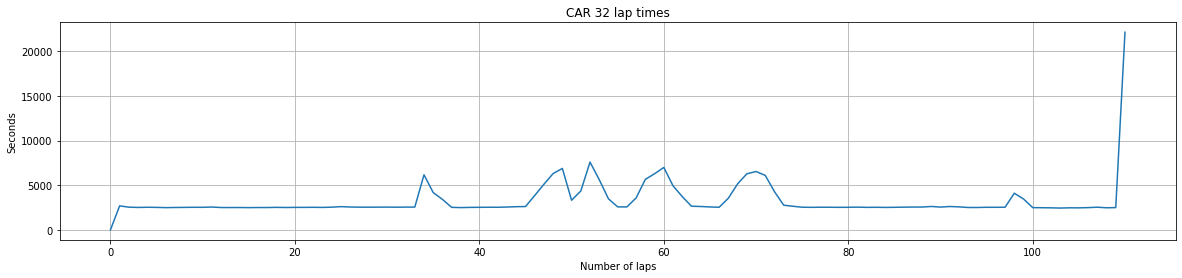

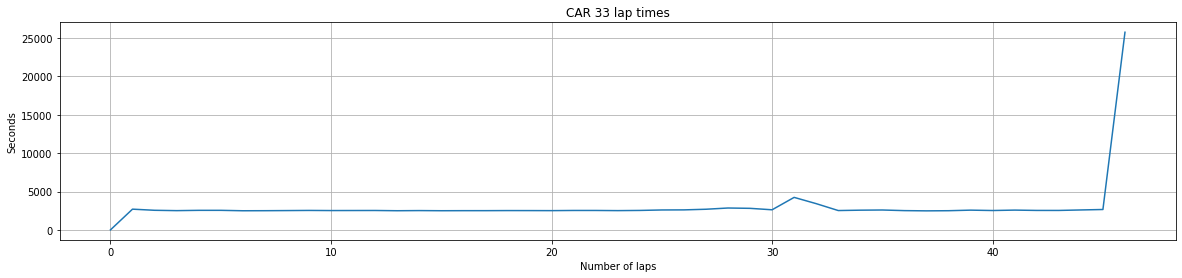

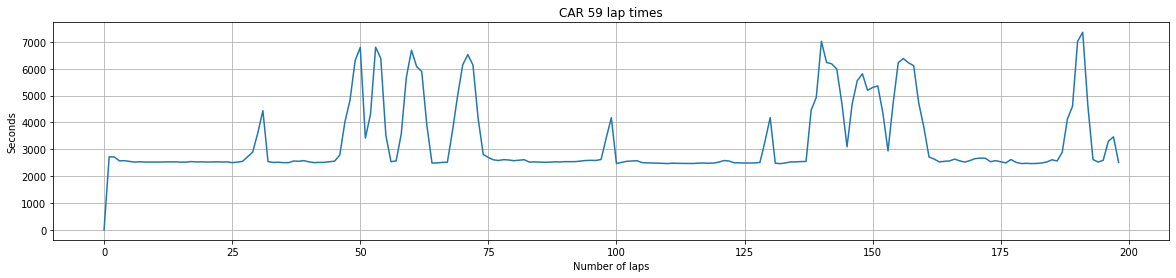

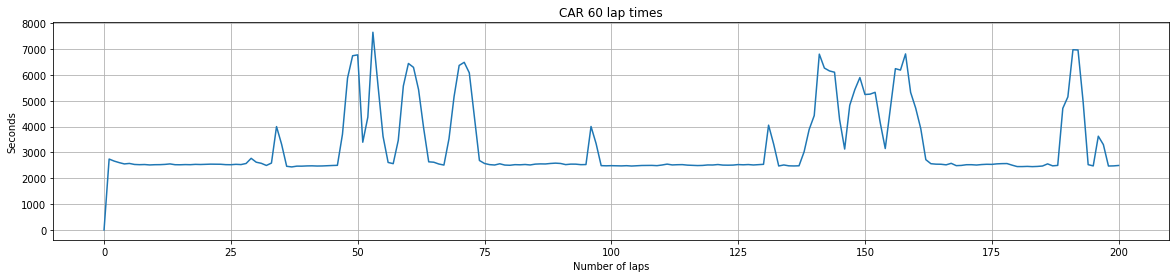

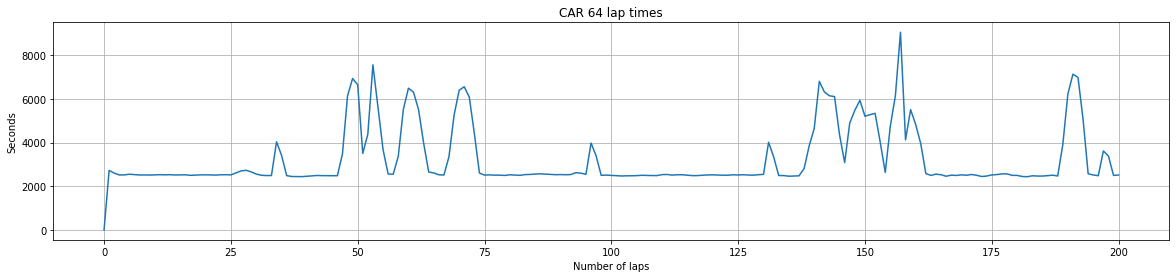

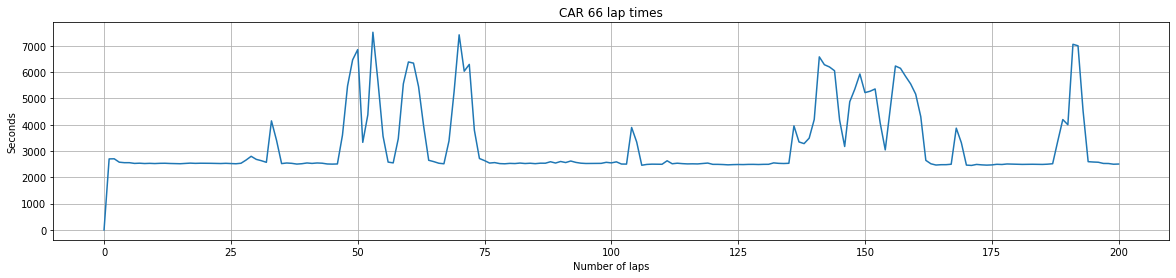

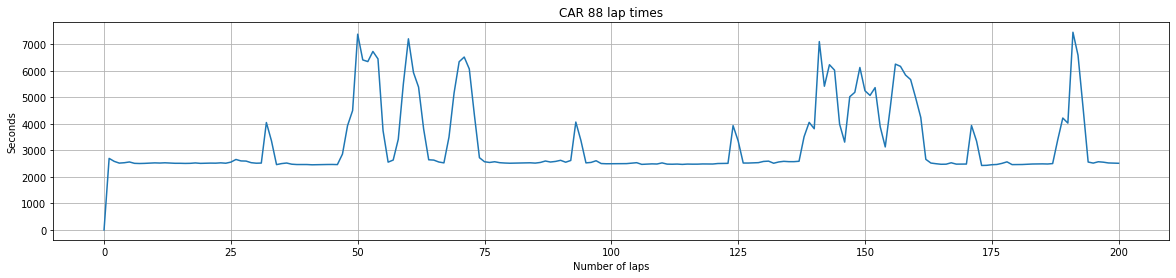

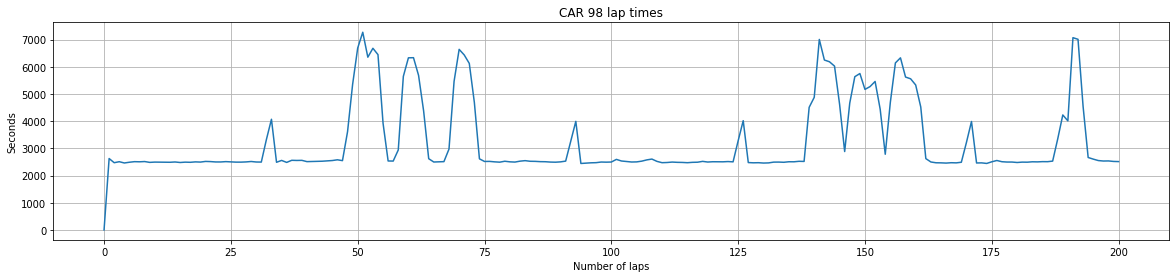

In [ ]:
for car in car_numbers:
  comp_car = comp_laps[comp_laps['car_number']==car]
  plt.figure(figsize=(20,4))
  plt.plot(comp_car['completed_laps'], comp_car['last_laptime'])
  plt.title('CAR '+ str(car) + ' lap times')
  plt.xlabel('Number of laps')
  plt.ylabel('Seconds')
  plt.grid(True)
  plt.show()

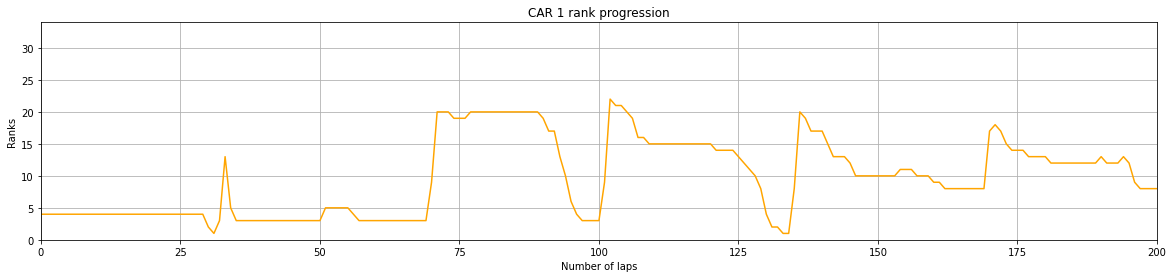

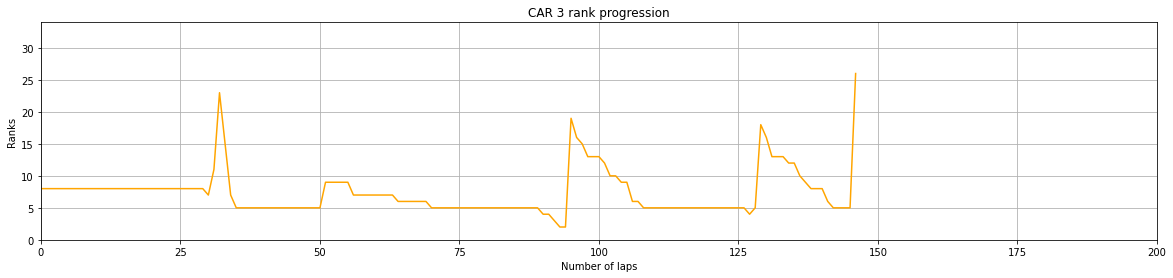

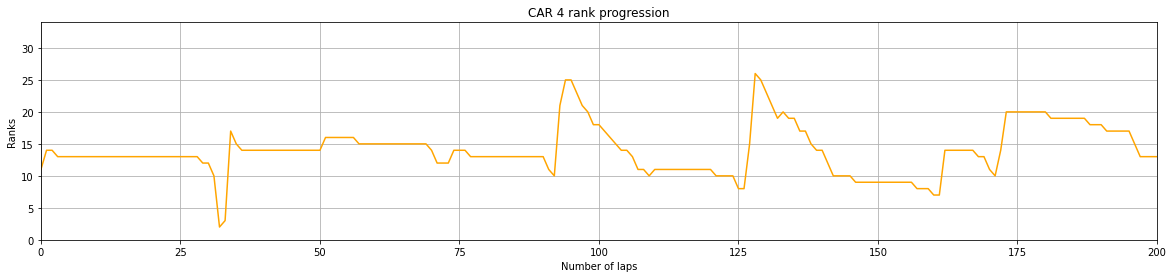

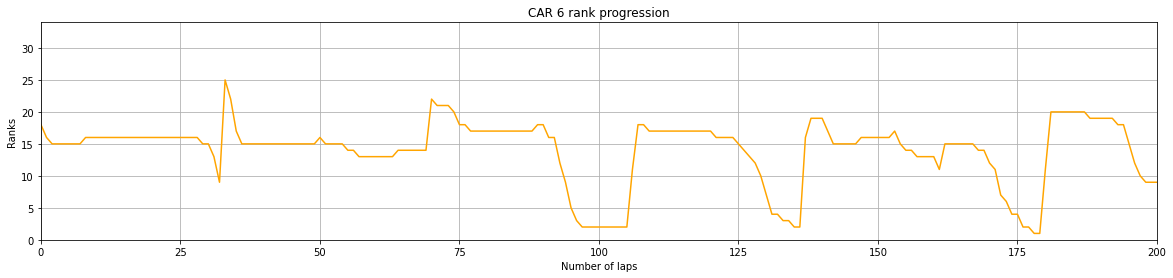

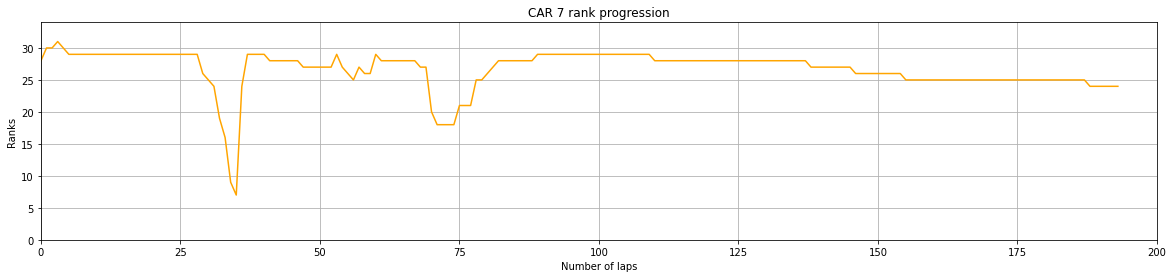

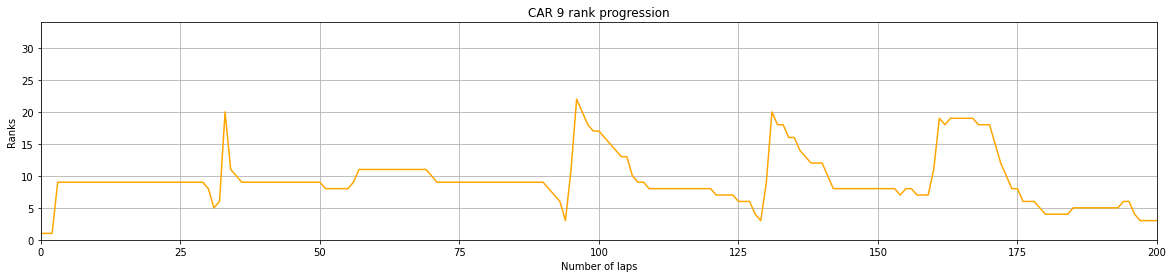

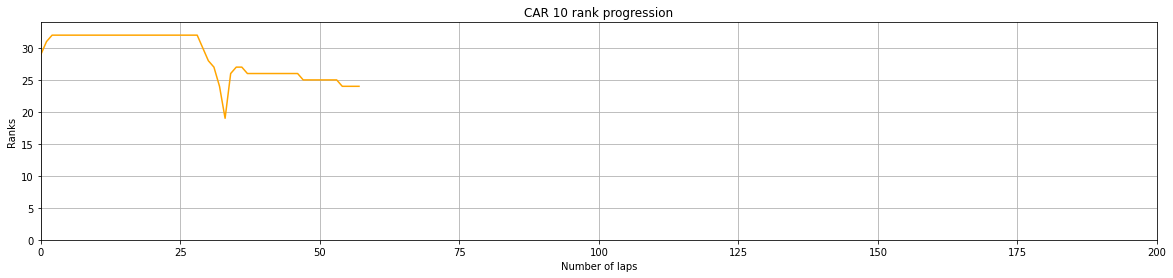

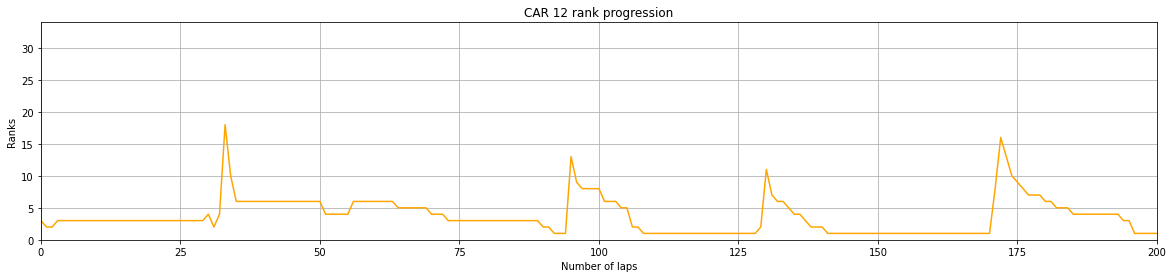

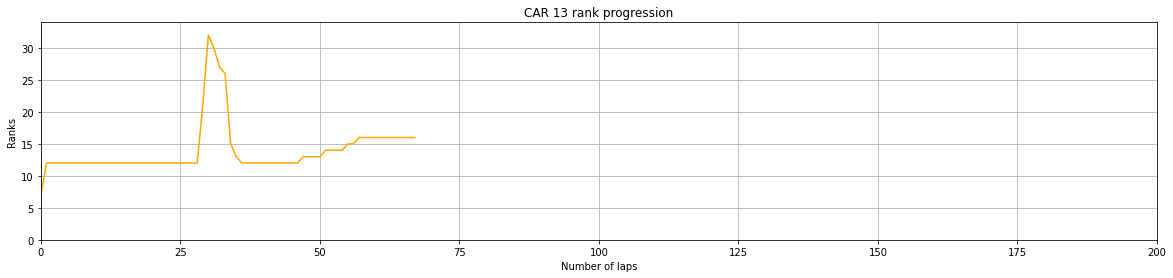

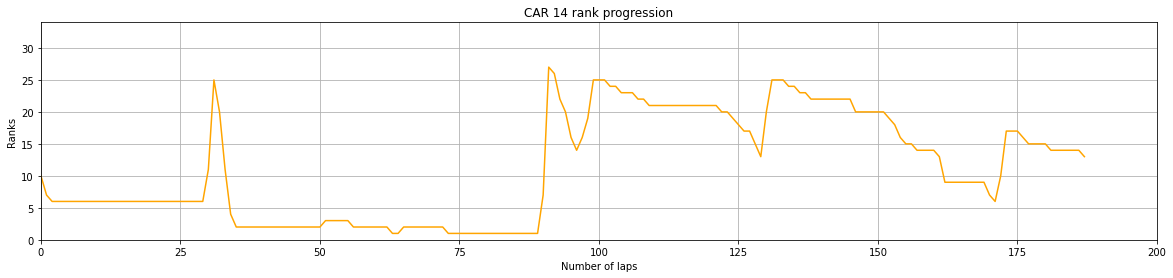

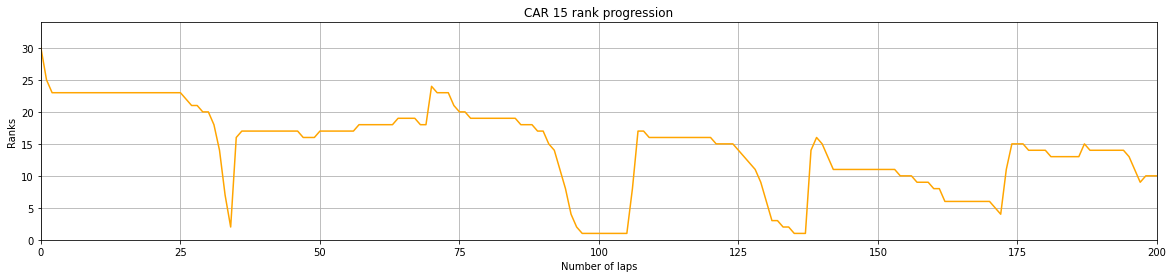

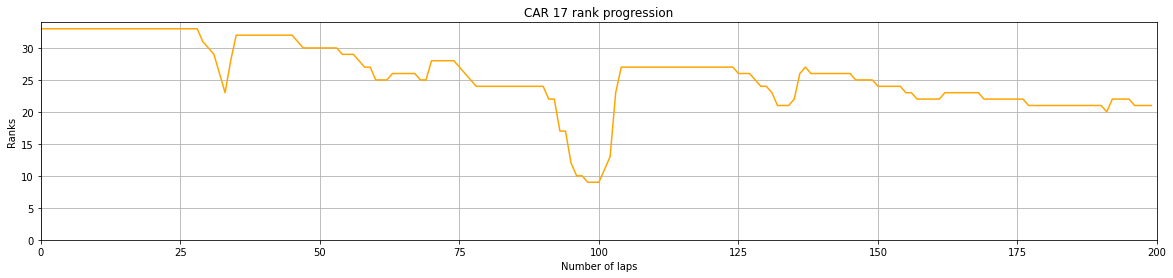

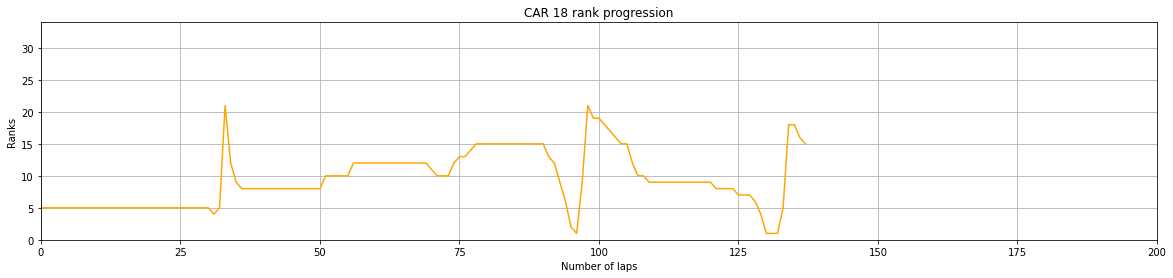

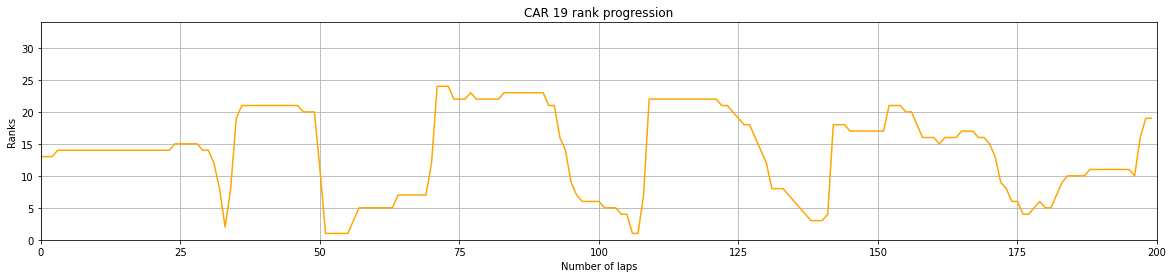

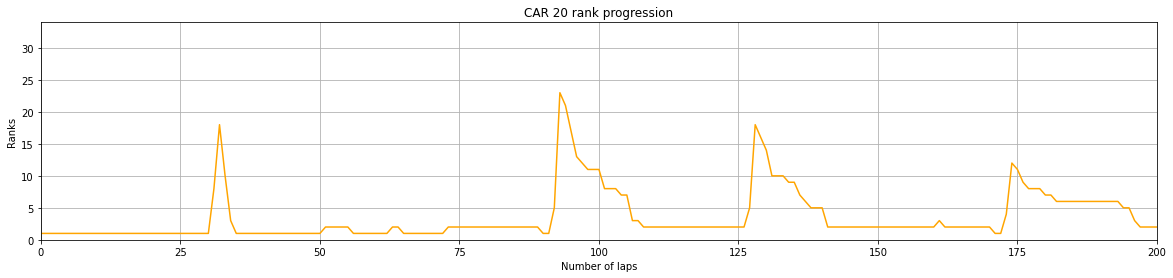

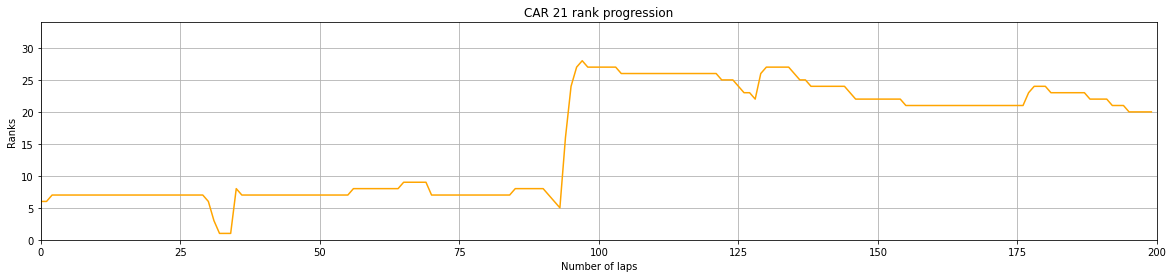

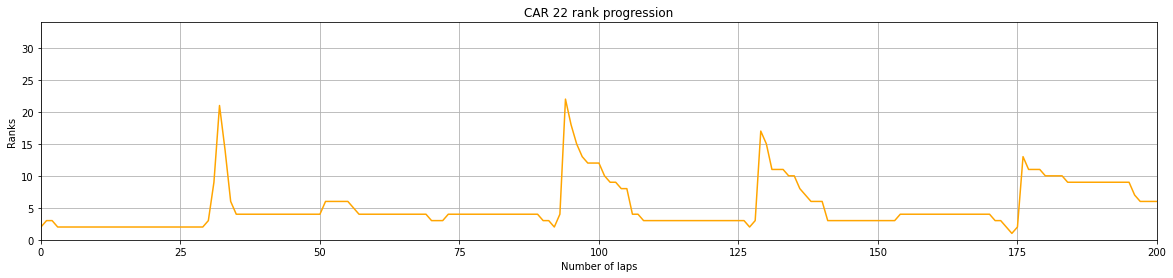

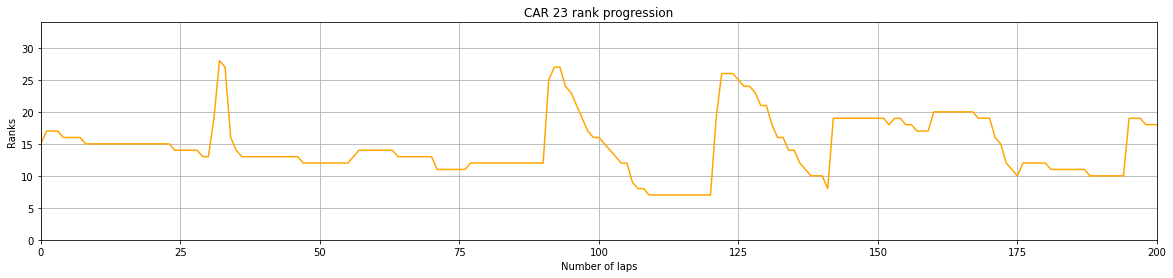

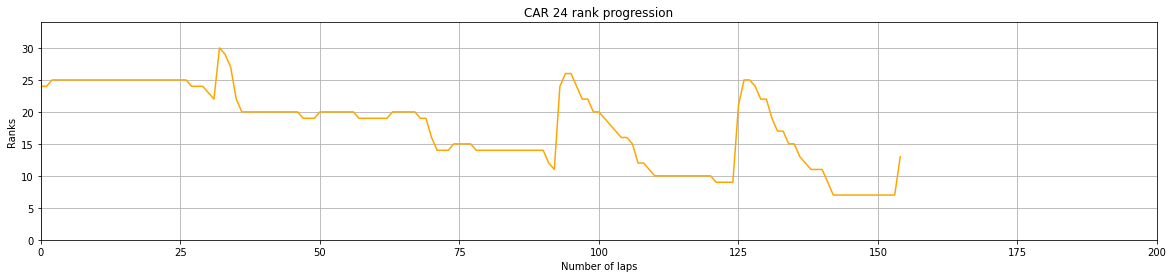

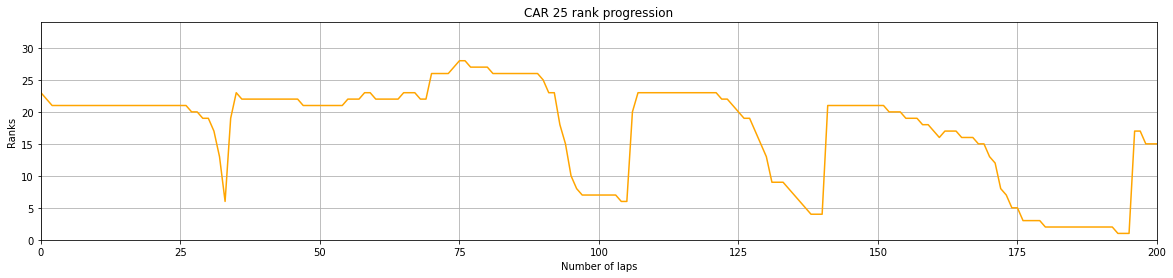

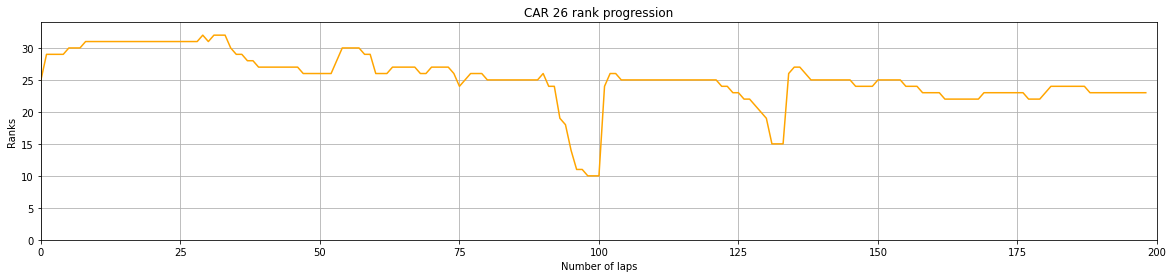

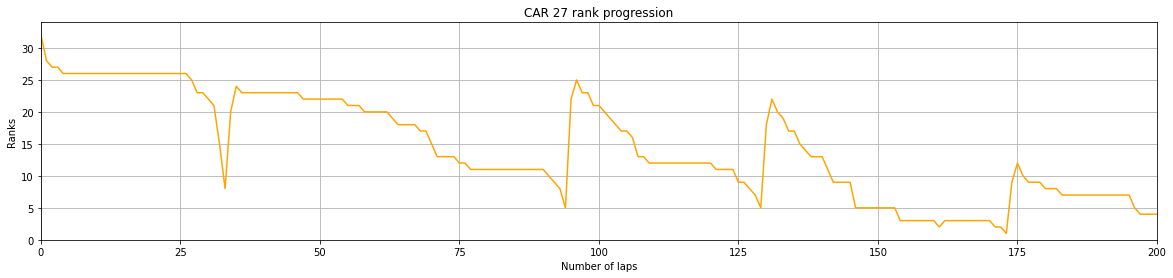

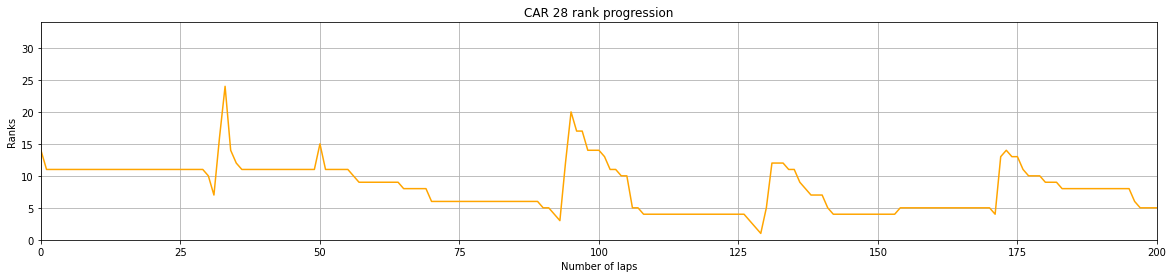

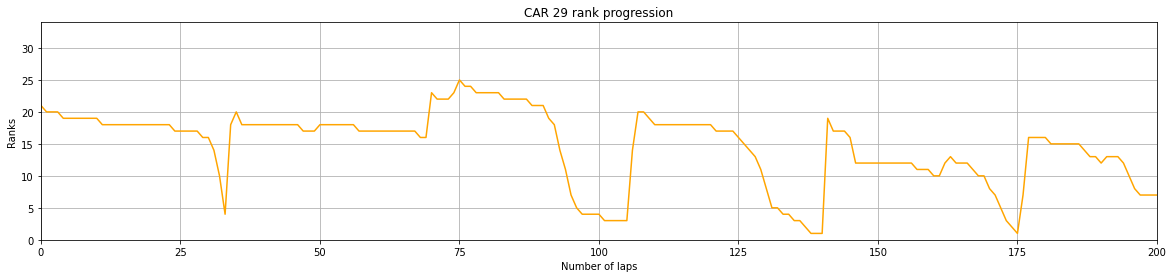

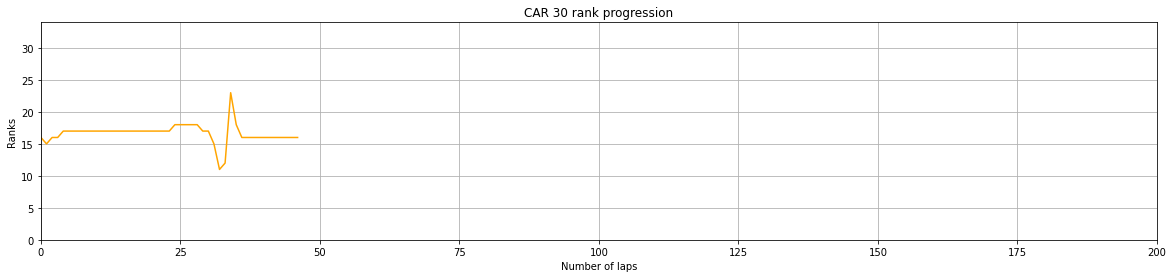

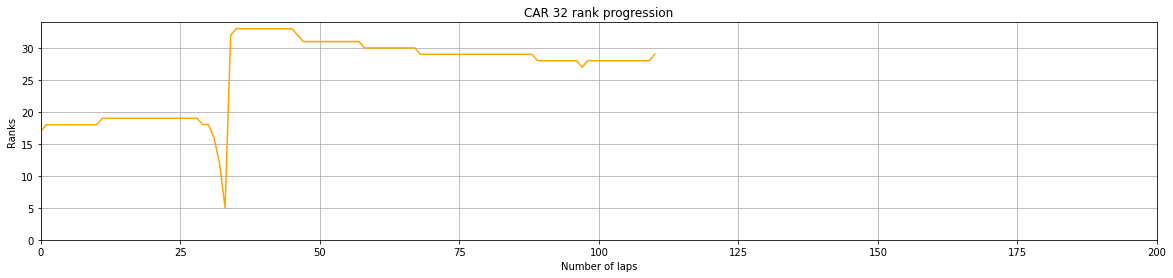

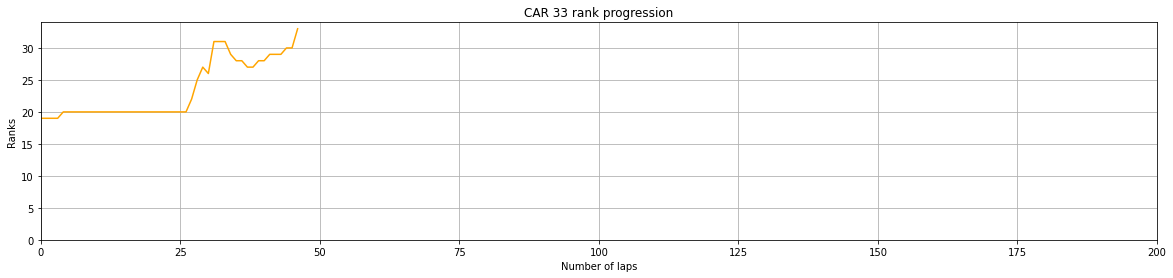

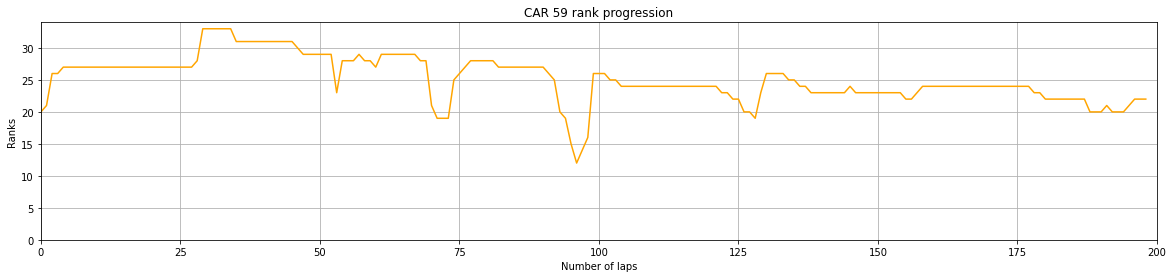

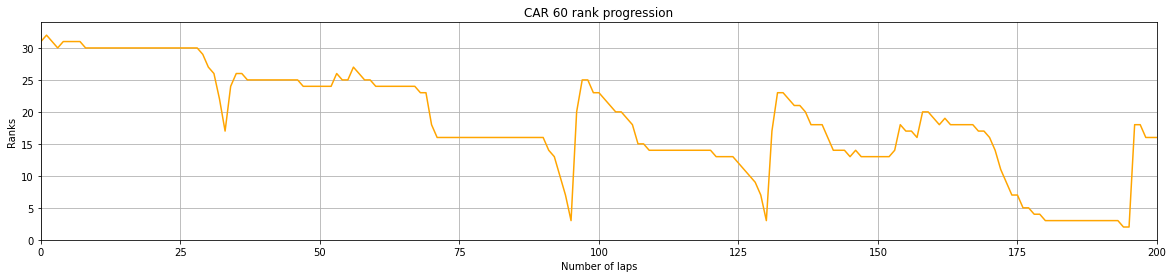

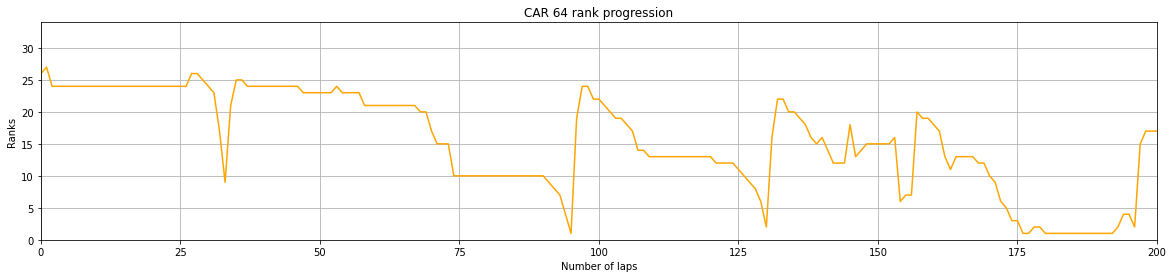

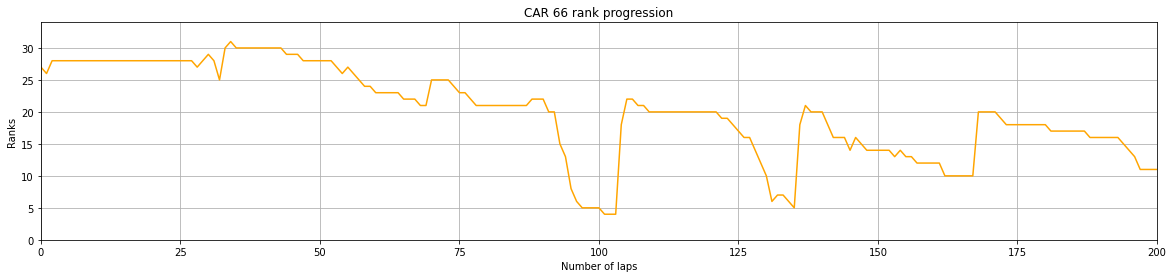

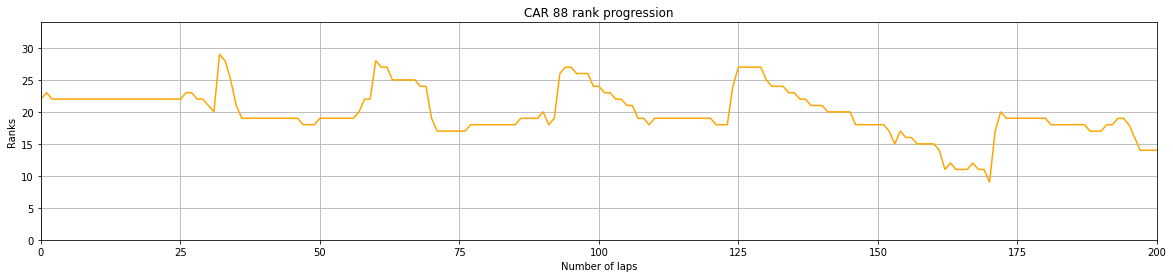

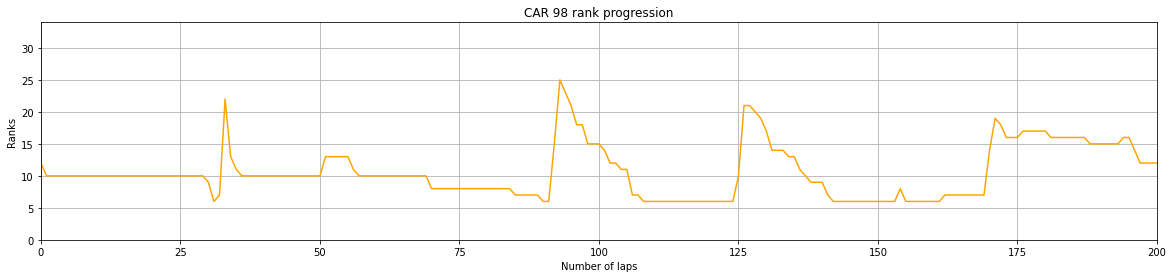

In [ ]:
for car in car_numbers:
  comp_car = comp_laps[comp_laps['car_number']==car]
  plt.figure(figsize=(20,4))
  plt.plot(comp_car['completed_laps'], comp_car['rank'], color='orange')
  plt.title('CAR '+ str(car) + ' rank progression')
  plt.xlabel('Number of laps')
  plt.ylabel('Ranks')
  plt.ylim([0, 34])
  plt.xlim([0, 200])
  plt.grid(True)
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

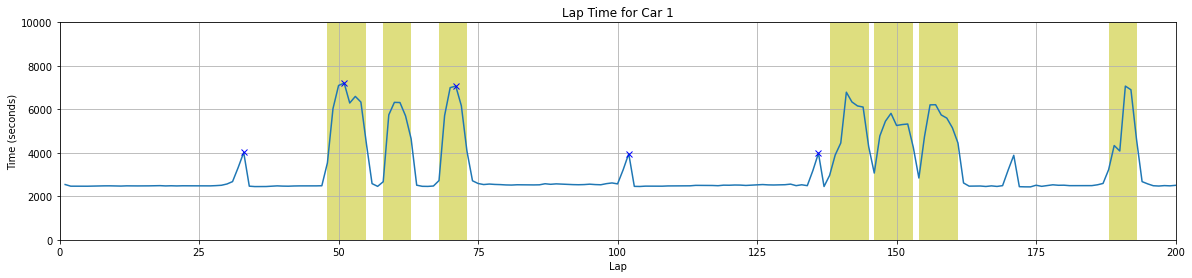

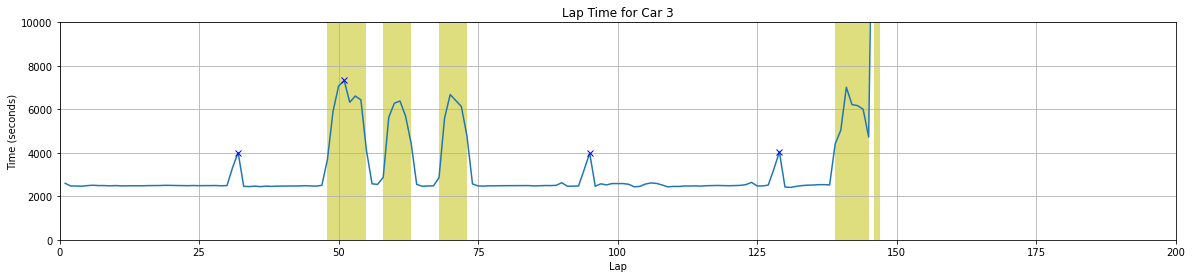

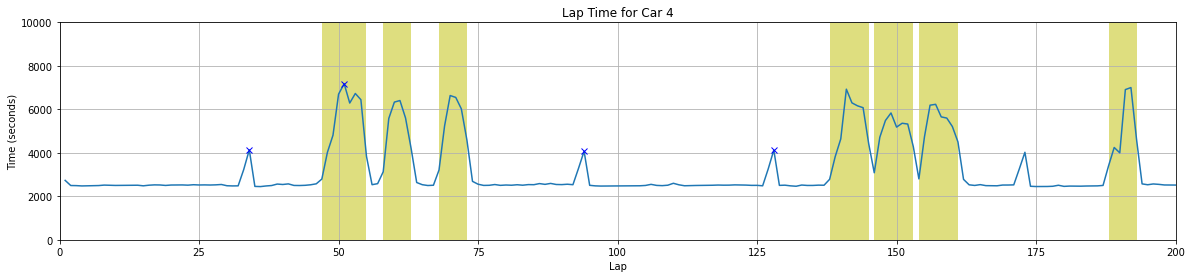

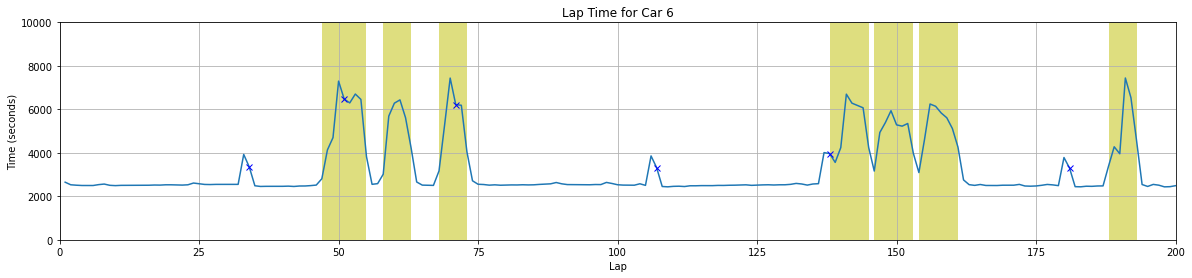

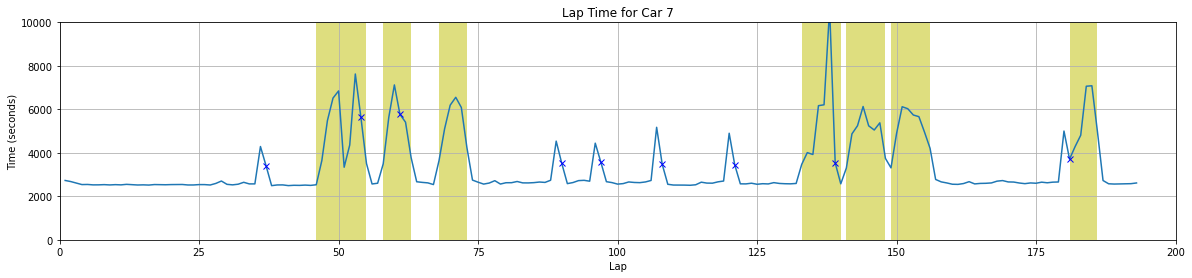

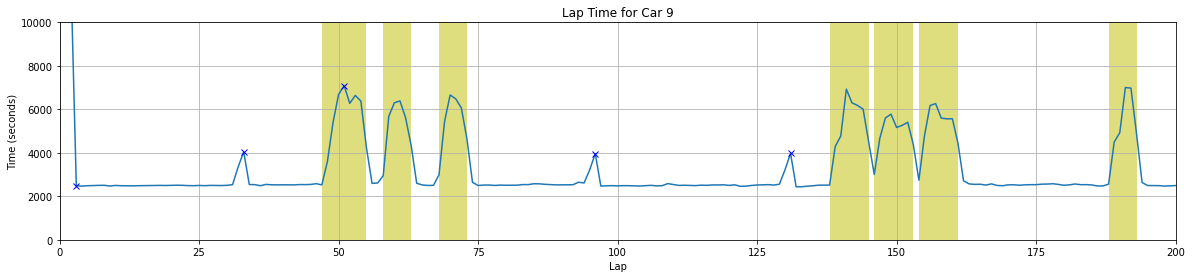

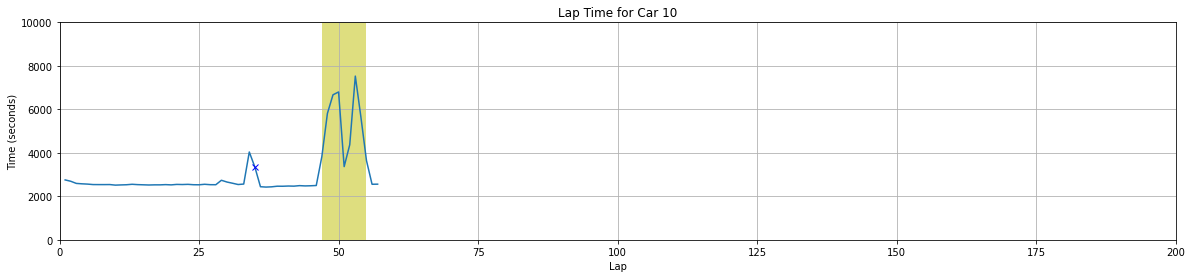

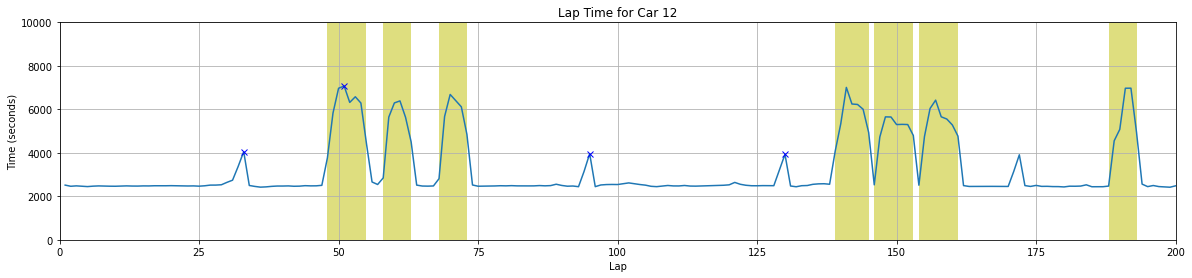

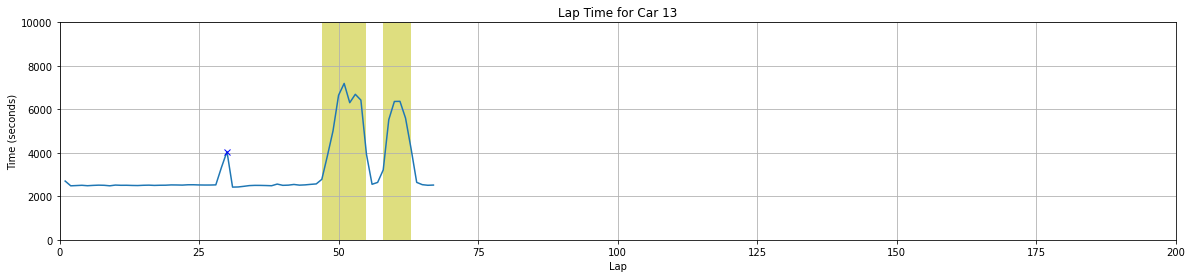

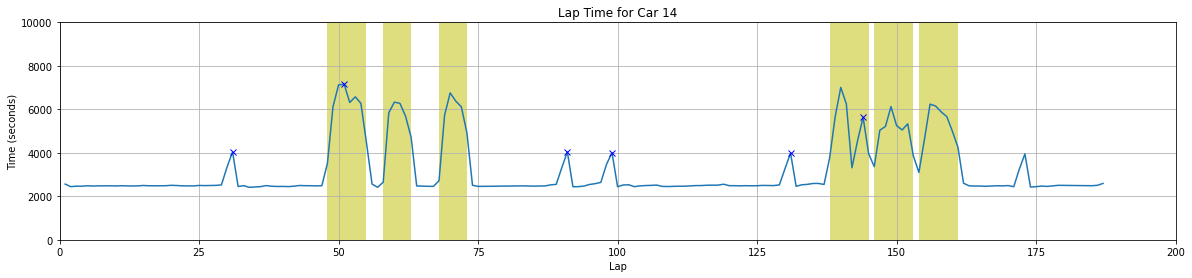

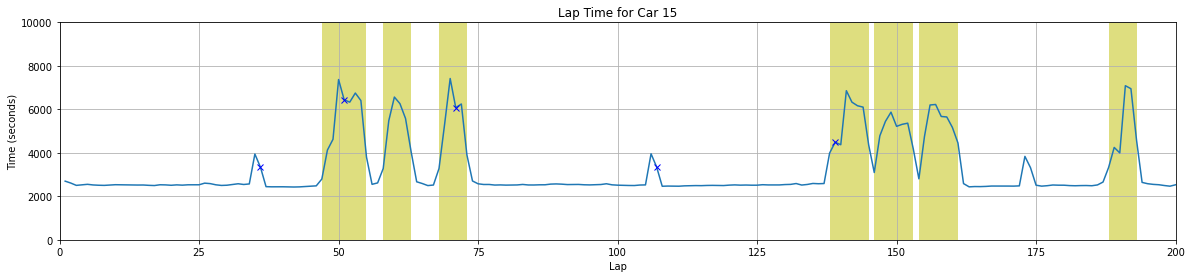

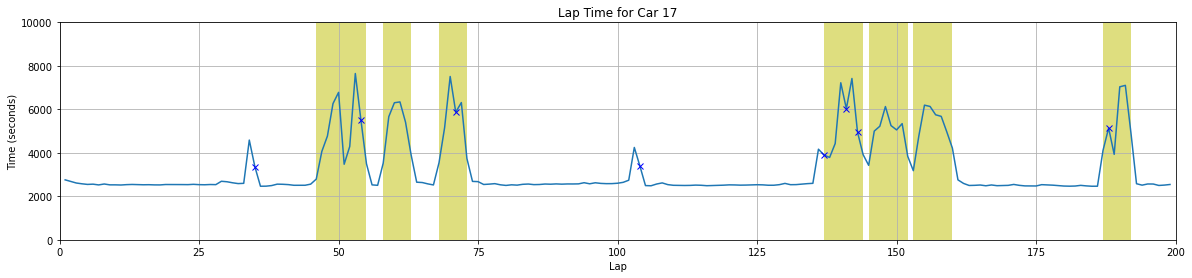

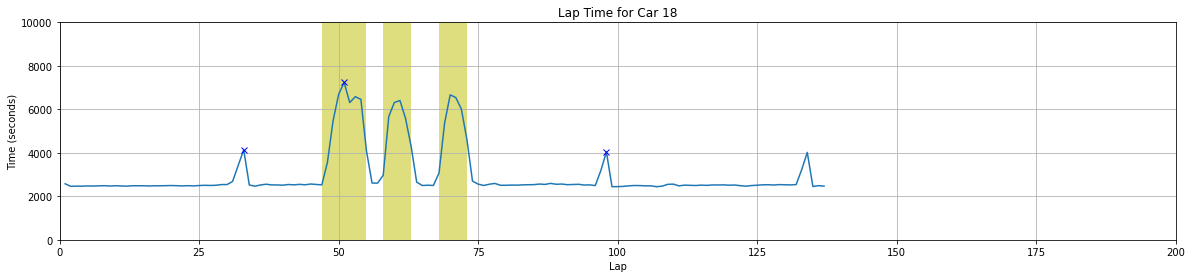

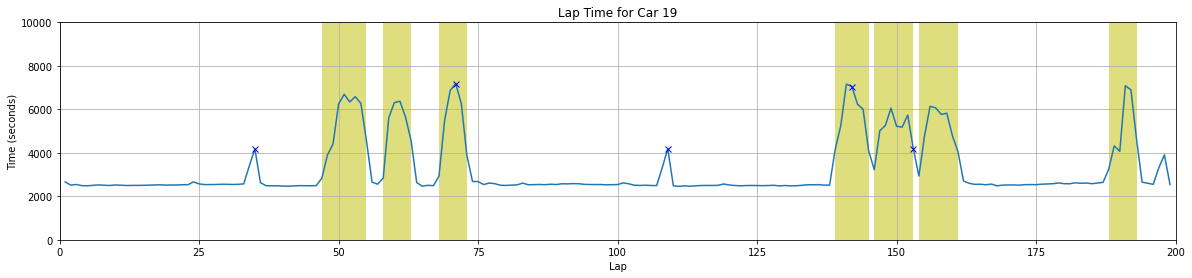

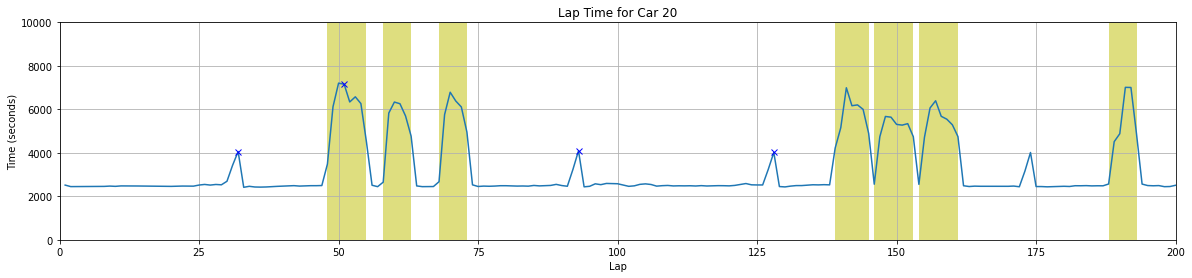

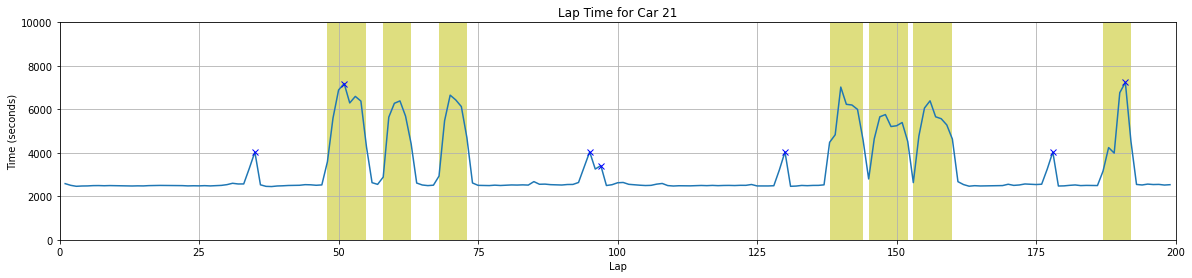

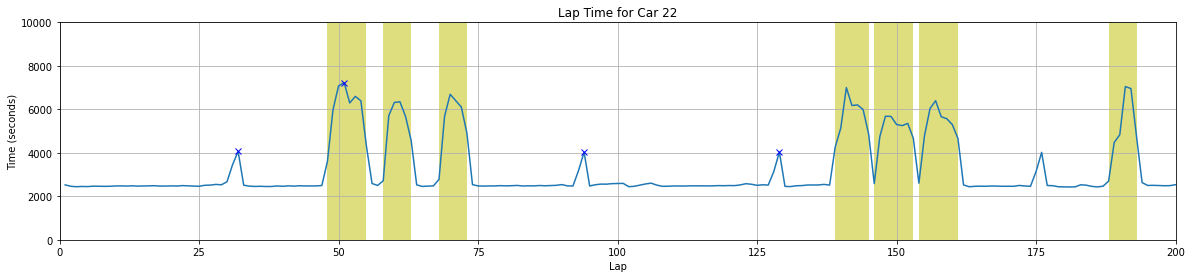

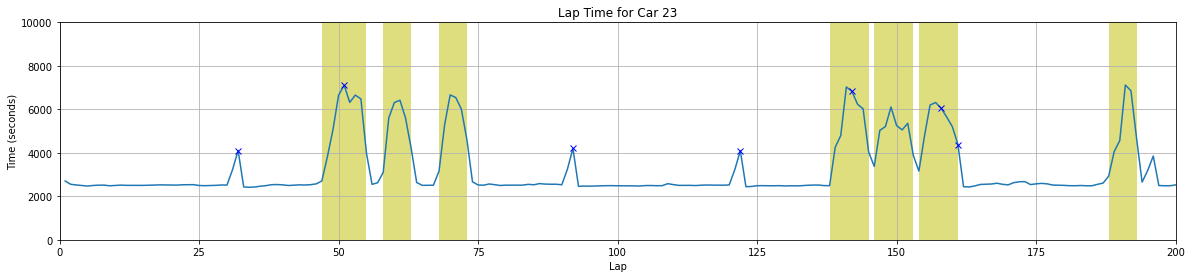

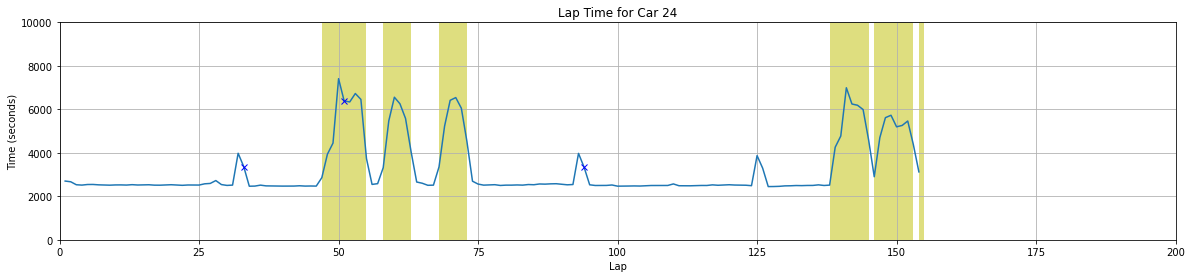

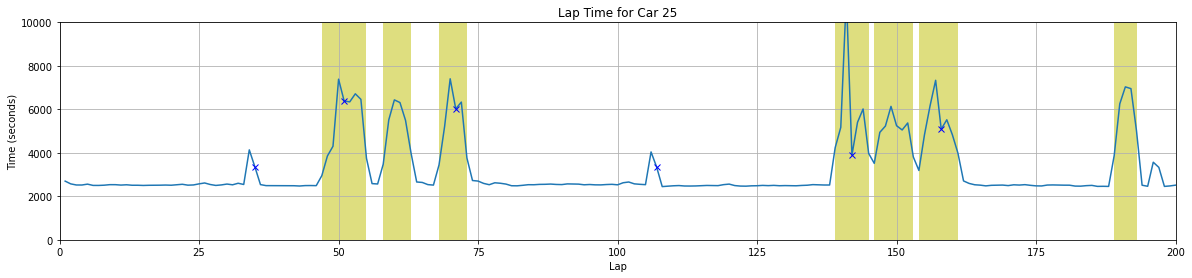

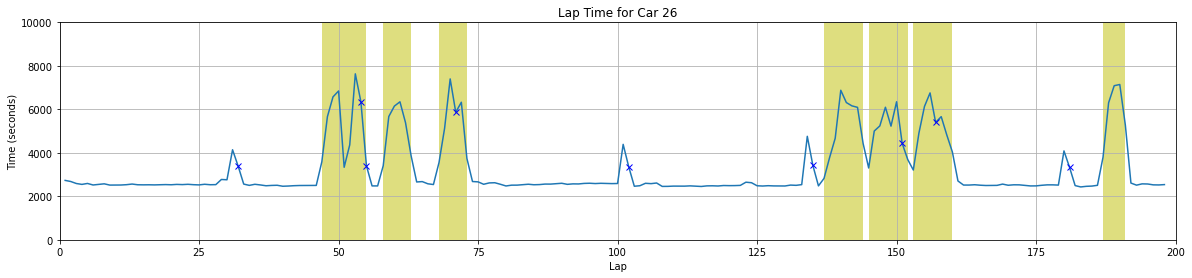

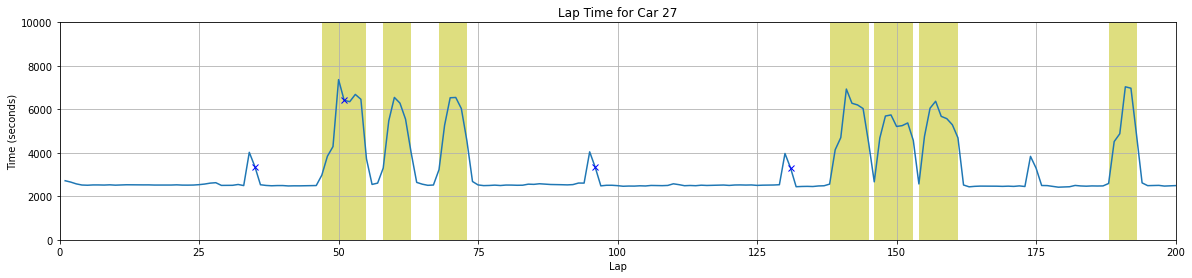

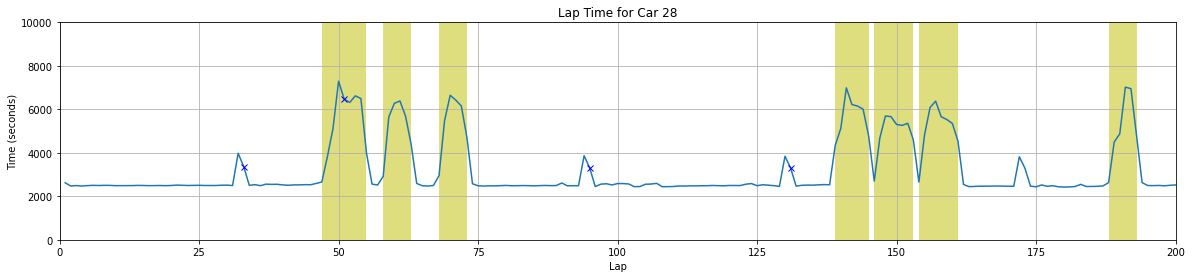

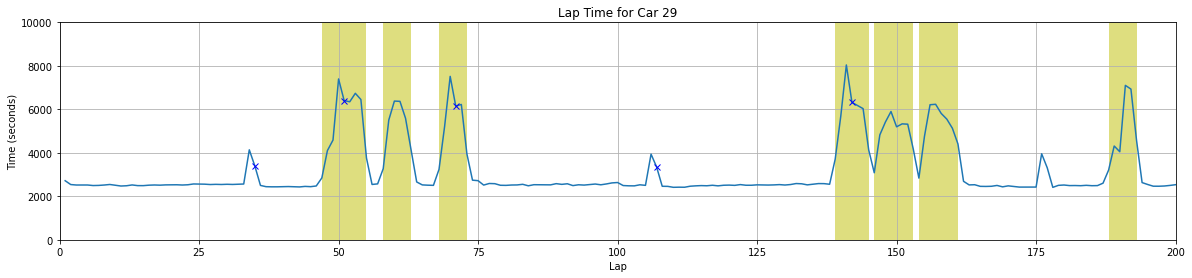

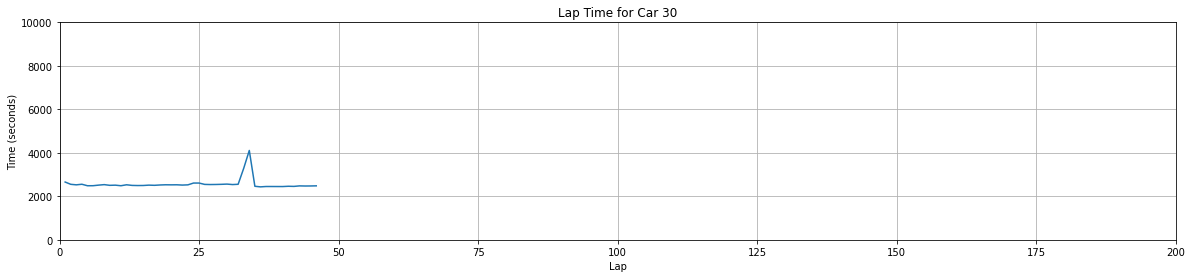

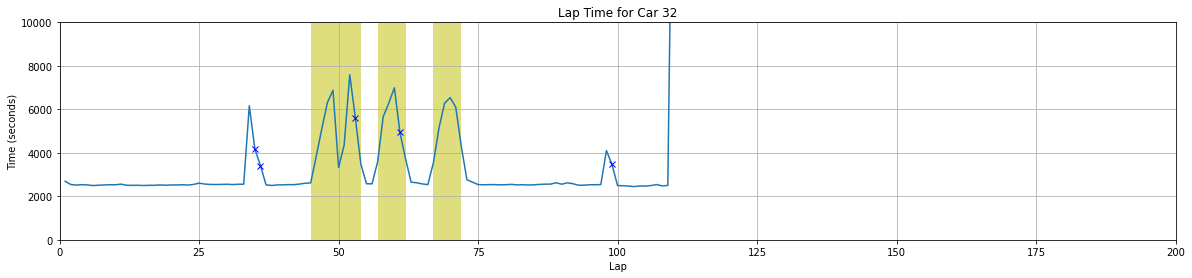

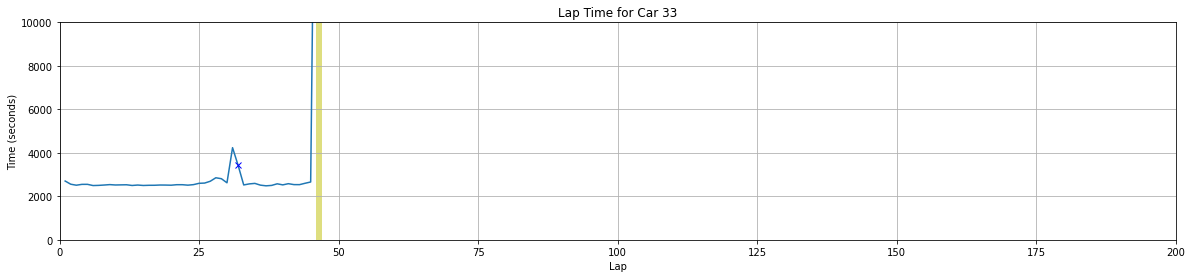

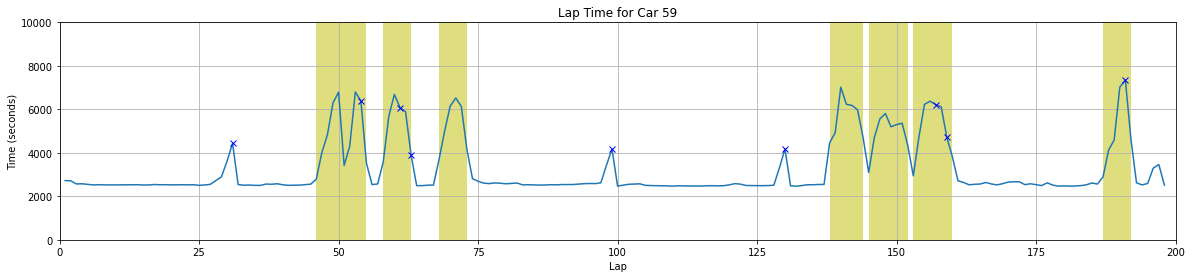

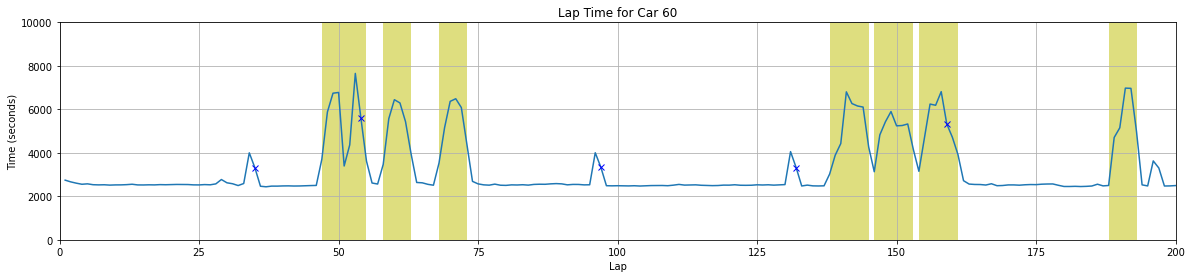

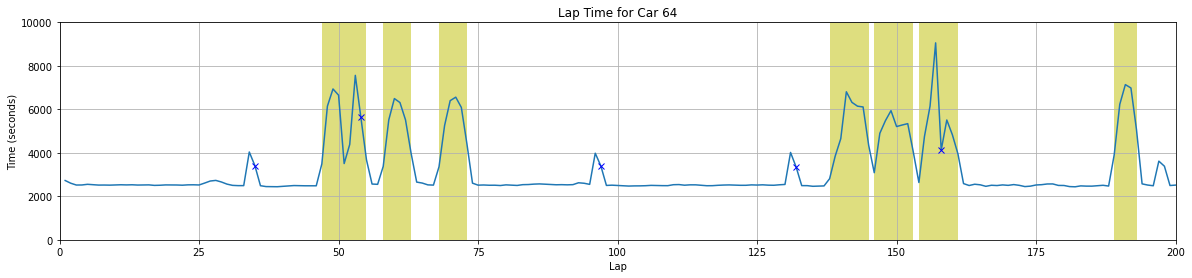

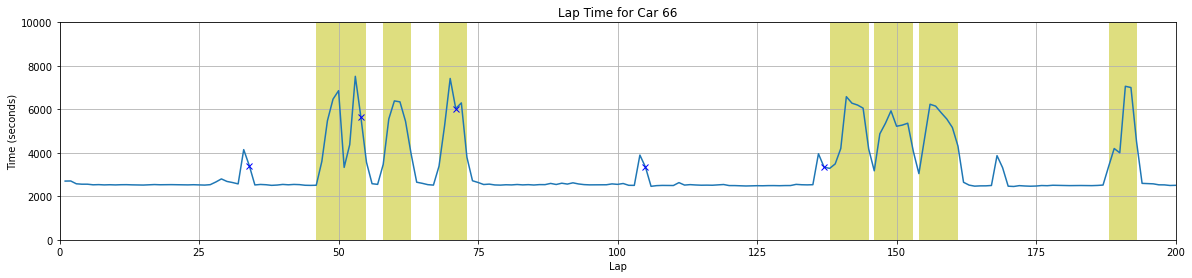

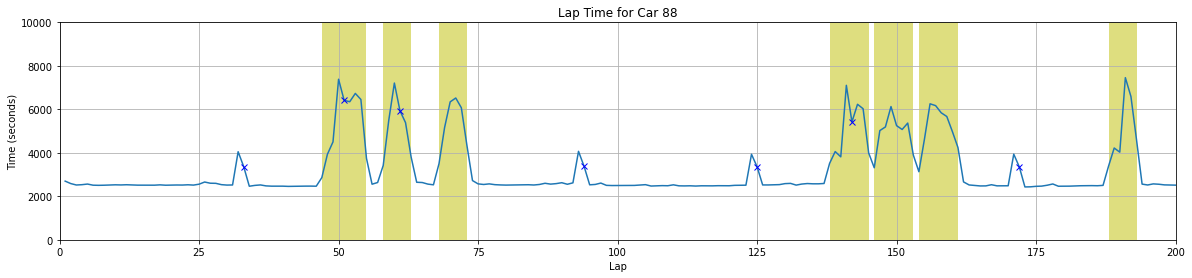

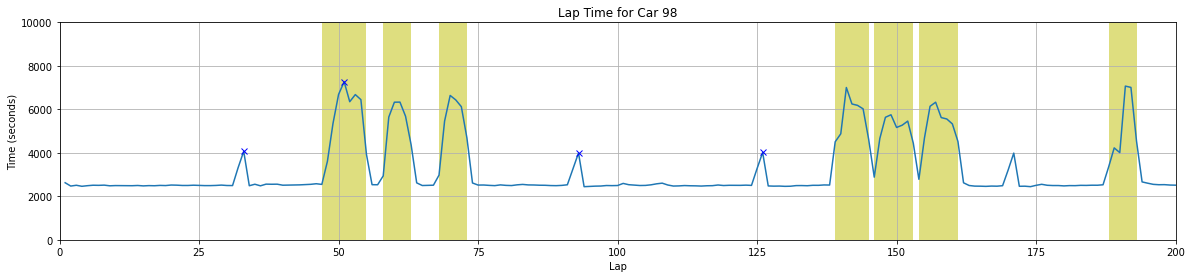

In [ ]:
for car in car_numbers:
  comp_car12 = comp_laps[comp_laps.car_number == car]
  comp_car12 = comp_car12[comp_car12.completed_laps != 0]

  lap_numbers  = comp_car12.completed_laps.values
  lap_times = comp_car12.last_laptime.values
 
  track_status = comp_car12.track_status.values
  pit_laps = comp_car12.last_pitted_lap.unique()[1:]

  fig = plt.figure(figsize=(20, 4))
  plt.plot(lap_numbers, lap_times)
  plt.grid(True)
  for i in lap_numbers:
    if track_status[i-1] == 'Y':
      plt.axvspan(i, i+1, facecolor='y', alpha=0.5)

  if len(lap_times < 200):
    pit_laps = pit_laps[:len(pit_laps)-1]
    for lap in pit_laps:
      plt.plot(lap +1, lap_times[lap], 'x', c='b')

  plt.ylabel('Time (seconds)')
  plt.xlabel('Lap')
  plt.title('Lap Time for Car '+ str(car))
  plt.xlim([0,200])
  plt.ylim([0, 10000])

In [ ]:
# comp_car12 = comp_laps[comp_laps.car_number == 12]
# comp_car12 = comp_car12[comp_car12.completed_laps > 3]

# lap_numbers  = comp_car12.completed_laps.values
# lap_times = comp_car12.last_laptime.values
# track_status = comp_car12.track_status.values
# pit_laps = comp_car12.last_pitted_lap.unique()[1:]

# fig = plt.figure(figsize=(10, 10))

# plt.plot(lap_numbers[-40:], lap_times[-40:])
# plt.grid(True)
# for i in lap_numbers[-40:]:
#   if track_status[i-4] == 'Y':
#     plt.axvspan(i, i+1, facecolor='y', alpha=0.5)

# for lap in pit_laps[pit_laps > 150]:
#   plt.plot(lap + 1, lap_times[lap-3], 'x', c='b')


# comp_car12 = comp_laps[comp_laps.car_number == 9]
# comp_car12 = comp_car12[comp_car12.completed_laps > 3]

# lap_numbers  = comp_car12.completed_laps.values
# lap_times = comp_car12.last_laptime.values
# track_status = comp_car12.track_status.values
# pit_laps = comp_car12.last_pitted_lap.unique()[1:]

# plt.plot(lap_numbers[-40:], lap_times[-40:])


# plt.legend(['car_12', 'pit_stop', 'car_9'])